<a href="https://colab.research.google.com/github/TechNejad/ml-project_beijing-air-quality/blob/main/THE_REAL_ML_project_China_Air_Pollution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **BEIJING AIR QUALITY ANALYSIS–A MACHINE LEARNING PROJECT**
---
> 🛠️ *This notebook is a work in progress. Some sections may be updated or expanded further.*

---


## Introduction & Project Purpose


This ML project explores air quality in Beijing from 2010 to 2014, focusing on fine particulate matter (PM2.5) and how it evolves over time in relation to meteorological and seasonal factors. The dataset is a time series, with hourly readings of PM2.5 and weather conditions such as temperature, wind speed, and pressure.

Our main objectives are to:
- **Predict future PM2.5 concentrations** using regression models, enabling air quality forecasting.
- **Classify air quality levels** (e.g., Good, Moderate, Unhealthy) based on AQI standards, making predictions easier to interpret for decision-making.
- **Identify the most influential features** (e.g., wind direction, temperature, time of day) to better understand what drives pollution variability.

To support these goals, we carry out **exploratory data analysis (EDA)** to uncover patterns and trends in the data, followed by **feature engineering** to prepare meaningful inputs for the final models.

*This project is developed as part of the “Fundamentals of Machine Learning” course in the Artificial Intelligence for Sustainable Societies Masters' program.*

**Contributors**: Deniz Yener & Mohsen Hassan Nejad

[DATASET](https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data)



---

###**Data Dictionary**


| Variable | Type              | Domain                                  |
|----------|-------------------|-----------------------------------------|
| No       | Discrete Numerical| 1 to 43,824 (Index of the data points)  |
| year     | Discrete Numerical| 2010 to 2014                            |
| month    | Discrete Numerical| 1 to 12                                 |
| day      | Discrete Numerical| 1 to 31                                 |
| hour     | Discrete Numerical| 0 to 23                                 |
| pm2.5    | Continuous Numerical | 0 to 1000+ (PM2.5 concentration in the air) |
| DEWP     | Continuous Numerical| Temperature scale (varied, Dew point temperature) |
| TEMP     | Continuous Numerical| Temperature in Celsius                 |
| PRES     | Continuous Numerical| Atmospheric pressure                    |
| cbwd     | Categorical       | Wind directions (e.g., NW, NE)         |
| Iws      | Continuous Numerical| Wind speed                              |
| Is       | Binary (Categorical)| 0 (No Snow) / 1 (Snow)                  |
| Ir       | Binary (Categorical)| 0 (No Rain) / 1 (Rain)                 |

---

### **Loading the Dataset**

We use the `ucimlrepo` library to fetch the Beijing PM2.5 dataset directly from the **UCI Machine Learning Repository**.

We separate the **features (`X`)**—such as temperature, wind speed, and pressure—from the **target variable (`y`)**, which is the PM2.5 concentration. This prepares the data for future modeling steps.

We display metadata and variable descriptions to review the structure and content of the dataset.



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset with ID 381 (Beijing PM 2.5)
beijing_pm2_5 = fetch_ucirepo(id=381)

# Extract the features and target variables
X = beijing_pm2_5.data.features
y = beijing_pm2_5.data.targets

# Metadata of the dataset
print(beijing_pm2_5.metadata)

# Information about the variables
print(beijing_pm2_5.variables)

{'uci_id': 381, 'name': 'Beijing PM2.5', 'repository_url': 'https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data', 'data_url': 'https://archive.ics.uci.edu/static/public/381/data.csv', 'abstract': 'This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included. ', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 43824, 'num_features': 11, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['pm2.5'], 'index_col': ['No'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C5JS49', 'creators': ['Song Chen'], 'intro_paper': {'ID': 432, 'type': 'NATIVE', 'title': "Assessing Beijing's PM2.5 pollution: severity, weather impact, APEC and winter heating", 'authors': 'Xuan Liang, T. Zou, Bi

---

## **1. DATA ANALYSIS, PREPARATION & VISUALIZATION**   ⚙
---

###**1.1 Setup and Initial Exploration**

#### **Libraries, Setup, and Data Preparation**

> We begin by importing the libraries needed for numerical operations, data manipulation, visualization, and machine learning. This includes tools for data preprocessing, model training, and evaluation.

> After loading the dataset, we combine the features (`X`) and the target variable (`y`, representing PM2.5 concentration) into a single DataFrame for easier inspection and manipulation in the next steps.










In [ ]:
# Core libraries for numerical computation and data manipulation
import numpy as np  # For numerical operations, arrays, etc.
import pandas as pd  # For data handling using DataFrames

# Libraries for visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For statistical data visualization built on top of Matplotlib
import matplotlib.dates as mdates  # For handling dates and times within Matplotlib plots
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

# Utility and data structure libraries
from collections import Counter  # For counting elements in a collection
import glob  # For finding files matching a pattern
import statistics  # For basic statistical calculations

# Machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation metrics
from sklearn.ensemble import RandomForestRegressor  # For the Random Forest regression model
from scipy.stats.mstats import winsorize # For Winsorizing data to handle outliers
from scipy.stats import median_abs_deviation # For Hampering outliers

# IPython and display libraries
from IPython import get_ipython  # For accessing the IPython kernel
from IPython.display import display  # For better display of DataFrames and other objects in Jupyter

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Combine features (X) and targets (y) into a single DataFrame
data = pd.concat([X, y], axis=1)

# The combined dataset
data.head()

year  month  day  hour  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  pm2.5
0  2010      1    1     0   -21 -11.0  1021.0   NW   1.79   0   0    NaN
1  2010      1    1     1   -21 -12.0  1020.0   NW   4.92   0   0    NaN
2  2010      1    1     2   -21 -11.0  1019.0   NW   6.71   0   0    NaN
3  2010      1    1     3   -21 -14.0  1019.0   NW   9.84   0   0    NaN
4  2010      1    1     4   -20 -12.0  1018.0   NW  12.97   0   0    NaN

In [ ]:
data.tail()

year  month  day  hour  DEWP  TEMP    PRES cbwd     Iws  Is  Ir  pm2.5
43819  2014     12   31    19   -23  -2.0  1034.0   NW  231.97   0   0    8.0
43820  2014     12   31    20   -22  -3.0  1034.0   NW  237.78   0   0   10.0
43821  2014     12   31    21   -22  -3.0  1034.0   NW  242.70   0   0   10.0
43822  2014     12   31    22   -22  -4.0  1034.0   NW  246.72   0   0    8.0
43823  2014     12   31    23   -21  -3.0  1034.0   NW  249.85   0   0   12.0

In [ ]:
print(data.columns)

Index(['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws',
       'Is', 'Ir', 'pm2.5'],
      dtype='object')


---
####**Column Renaming**

*We rename the columns to more descriptive and readable labels. This step improves clarity and consistency for analysis and visualization. We also check for any duplicate datetime columns and remove them if needed.*


In [ ]:
# Renaming the columns
data.rename(columns = {
    'year': 'Year',
    'month': 'Month',
    'day': "Day",
    'hour': 'Hour',
    'pm2.5': 'PM2.5',
    'DEWP': 'DewP',
    'TEMP': 'Temp',
    'PRES': 'Press',
    'cbwd': 'WinDir',
    'Iws': 'WindSpeed',
    'Is': 'HoursOfSnow',
    'Ir': 'HoursOfRain'
}, inplace=True)

# Displaying the updated DataFrame
data.head()

Year  Month  Day  Hour  DewP  Temp   Press WinDir  WindSpeed  HoursOfSnow  \
0  2010      1    1     0   -21 -11.0  1021.0     NW       1.79            0   
1  2010      1    1     1   -21 -12.0  1020.0     NW       4.92            0   
2  2010      1    1     2   -21 -11.0  1019.0     NW       6.71            0   
3  2010      1    1     3   -21 -14.0  1019.0     NW       9.84            0   
4  2010      1    1     4   -20 -12.0  1018.0     NW      12.97            0   

   HoursOfRain  PM2.5  
0            0    NaN  
1            0    NaN  
2            0    NaN  
3            0    NaN  
4            0    NaN

In [ ]:
# Ensure 'datetime' is not duplicated in columns
if 'datetime' in data.columns:
    data.drop(columns=['datetime'], inplace=True)

---
####**Creating a Time Index**
*To prepare the dataset for time-series analysis, we create a new `datetime` column by combining the year, month, day, and hour values. We then set this column as the DataFrame index. This allows us to resample, filter, and analyze the data in a time-aware way going forward.*


In [ ]:
# Create a new datetime column from Year, Month, Day, and Hour
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])

# Reset the index (if needed) but don't keep the old index as a column
data.reset_index(drop=True, inplace=True)

# Set the datetime column as the index
data.set_index('datetime', inplace=True)

# Check the result
print(data.head())


                     Year  Month  Day  Hour  DewP  Temp   Press WinDir  \
datetime                                                                 
2010-01-01 00:00:00  2010      1    1     0   -21 -11.0  1021.0     NW   
2010-01-01 01:00:00  2010      1    1     1   -21 -12.0  1020.0     NW   
2010-01-01 02:00:00  2010      1    1     2   -21 -11.0  1019.0     NW   
2010-01-01 03:00:00  2010      1    1     3   -21 -14.0  1019.0     NW   
2010-01-01 04:00:00  2010      1    1     4   -20 -12.0  1018.0     NW   

                     WindSpeed  HoursOfSnow  HoursOfRain  PM2.5  
datetime                                                         
2010-01-01 00:00:00       1.79            0            0    NaN  
2010-01-01 01:00:00       4.92            0            0    NaN  
2010-01-01 02:00:00       6.71            0            0    NaN  
2010-01-01 03:00:00       9.84            0            0    NaN  
2010-01-01 04:00:00      12.97            0            0    NaN  


---
####**Missing Data Count**
*We begin our exploratory data analysis by checking for missing values in the dataset.*


In [ ]:
# Check the null data
data.isnull().sum()

Year              0
Month             0
Day               0
Hour              0
DewP              0
Temp              0
Press             0
WinDir            0
WindSpeed         0
HoursOfSnow       0
HoursOfRain       0
PM2.5          2067
dtype: int64

---
####**Descriptive Statistics**
We investigate the summary statistics for all numerical variables. This gives us a sense of the distributions, central tendencies, and potential outliers—particularly for PM2.5, which shows high variability and some extreme values.


In [ ]:
data.describe()

Year         Month           Day          Hour          DewP  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean    2012.000000      6.523549     15.727820     11.500000      1.817246   
std        1.413842      3.448572      8.799425      6.922266     14.433440   
min     2010.000000      1.000000      1.000000      0.000000    -40.000000   
25%     2011.000000      4.000000      8.000000      5.750000    -10.000000   
50%     2012.000000      7.000000     16.000000     11.500000      2.000000   
75%     2013.000000     10.000000     23.000000     17.250000     15.000000   
max     2014.000000     12.000000     31.000000     23.000000     28.000000   

               Temp         Press     WindSpeed   HoursOfSnow   HoursOfRain  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean      12.448521   1016.447654     23.889140      0.052734      0.194916   
std       12.198613     10.268698     50.010635      0.760375      1.415867   
min      -19.000000    991.000000      0.450000      0.000000      0.000000   
25%        2.000000   1008.000000      1.790000      0.000000      0.000000   
50%       14.000000   1016.000000      5.370000      0.000000      0.000000   
75%       23.000000   1025.000000     21.910000      0.000000      0.000000   
max       42.000000   1046.000000    585.600000     27.000000     36.000000   

              PM2.5  
count  41757.000000  
mean      98.613215  
std       92.050387  
min        0.000000  
25%       29.000000  
50%       72.000000  
75%      137.000000  
max      994.000000

---
#####🔑 **Key Insights:**

**Air Quality Variable (PM2.5):**
- **Mean:** 98.61, **Std:** 92.05 → indicates high variability.
- **Min:** 0.0, **Max:** 994.0 → presence of extreme values likely representing pollution episodes or outliers.
- **Missing Values:** 2,067 (~4.72%) → will need imputation or handling before modeling.

**Meteorological Variables:**
- **Temperature (Temp):** Ranges from -19°C to 42°C → likely strong seasonal patterns.
- **Dew Point (DewP):** Broad range from -19 to 42°C, generally tracks with Temp.
- **WindSpeed:** Ranges from 0.45 to 585.6 m/s → extremely high values suggesting the need for outlier inspection or removal.
- **Pressure (Press):** Relatively stable around 1016 hPa, less likely to vary meaningfully.


---

###**1.2   TARGET VARIABLE [PM2.5] CHARACTERISTICS**

---

#### **PM2.5 Distribution Overview – Histogram with KDE & Boxen Plot**

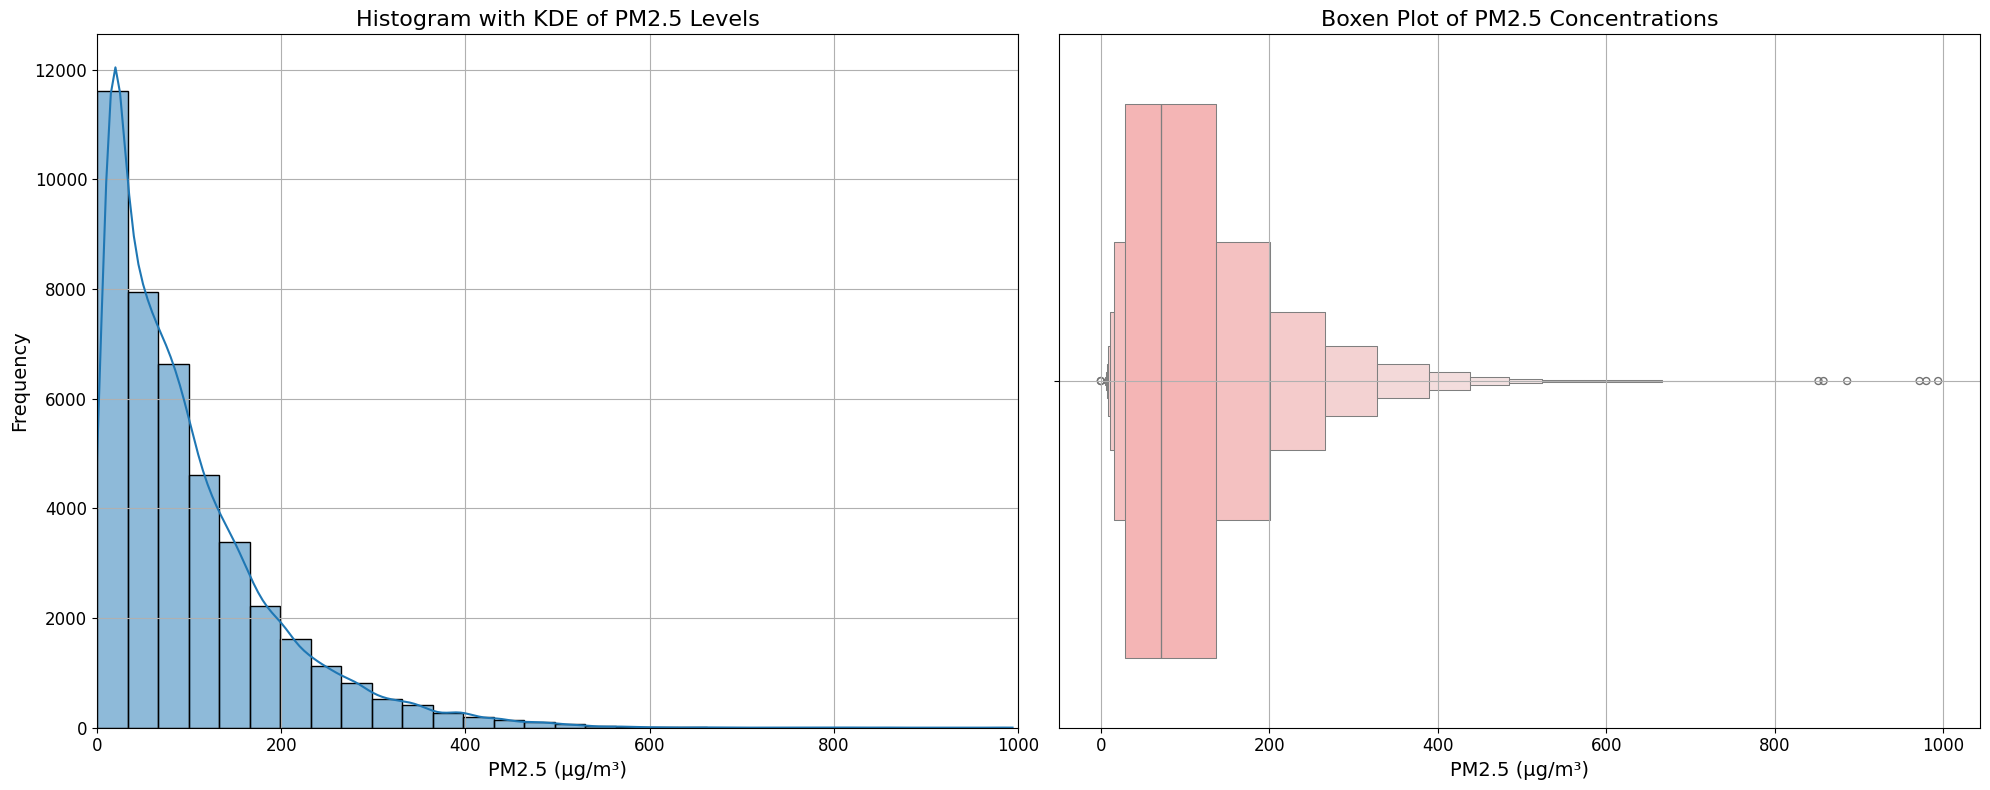

PM2.5 Range Percentage
0       0-200    83.224%
1     200-400    10.798%
2     400-600     1.189%
3     600-800     0.048%
4    800-1000     0.025%

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Adjust figsize for width and height

# Histogram with KDE on the first subplot (axes[0])
sns.histplot(data['PM2.5'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Histogram with KDE of PM2.5 Levels", fontsize=16)  # Increase title font size
axes[0].set_xlabel("PM2.5 (µg/m³)", fontsize=14)  # Increase x-axis label font size
axes[0].set_ylabel("Frequency", fontsize=14)  # Increase y-axis label font size
axes[0].grid(True)
axes[0].set_xlim(0, 1000)
axes[0].tick_params(axis='both', which='major', labelsize=12)  # Increase tick label font size


# Boxen plot on the second subplot (axes[1])
sns.boxenplot(x=data['PM2.5'], ax=axes[1], color='#FFAAAA')  # Light red color
axes[1].set_title("Boxen Plot of PM2.5 Concentrations", fontsize=16)  # Increase title font size
axes[1].set_xlabel("PM2.5 (µg/m³)", fontsize=14)  # Increase x-axis label font size
axes[1].grid(True)
axes[1].tick_params(axis='both', which='major', labelsize=12)  # Increase tick label font size


# Define PM2.5 ranges and labels for percentage calculation
ranges = [(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000)]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000']
percentage_data = []
total_data = len(data['PM2.5'])

for i, (lower, upper) in enumerate(ranges):
    count = len(data[(data['PM2.5'] >= lower) & (data['PM2.5'] < upper)])
    percentage = (count / total_data) * 100
    percentage_data.append([labels[i], f'{percentage:.3f}%'])

# Create and display the percentage table below the plots
percentage_table = pd.DataFrame(percentage_data, columns=['PM2.5 Range', 'Percentage'])

# Adjust layout to prevent overlapping and display the plots
plt.tight_layout()
plt.show()

# Display the table below the plots
display(percentage_table)

---
##### 🔑 **Key Insights:**

- PM2.5 values are highly **right-skewed**, with the majority (83.2%) below 200 µg/m³.
- Only 10.8% of the data falls in the 200–400 µg/m³ range, typically representing short-term pollution surges.
- 1.2% of the data exceeds 400 µg/m³, and values above 600 µg/m³ are **extremely rare** (~0%).
- This validates previous findings that extreme outliers are infrequent, and values >600 µg/m³ may warrant special treatment (e.g., winsorization, removal, or contextual verification).
- The skewed nature of the data may call for **scaling** or **log transformation** before model training.

- The boxen plot confirms that PM2.5 is highly skewed with a long right tail, indicating the presence of extreme values and possible outliers.



---
#### **PM2.5 Levels Over Time and Air Quality Index (AQI) Comparison: US, China and WHO Standards**

> **Note:** The AQI classifications in this project follow official air quality standards from:
> - **US EPA** (Environmental Protection Agency), which defines PM2.5 thresholds for AQI categories based on health impacts [EPA AQI Factsheet, 2012].
> - **Chinese HJ 633-2012**, issued by China's Ministry of Ecology and Environment, outlining PM2.5 breakpoints and pollution severity categories [HJ 633-2012 official regulation].
> - **World Health Organization (WHO)** guidelines, revised in 2021, which recommend a daily average PM2.5 limit of 15 µg/m³ and an annual average of 5 µg/m³, based solely on health risk evidence.

> These standards are referenced and explained in detail in the project file *Understanding and Interpreting PM2.5 Concentration Levels in Beijing* and official regulatory documents........ Refrence comes here ......


---
####**Annual PM2.5 Levels vs AQI Standards (2011–2015)**

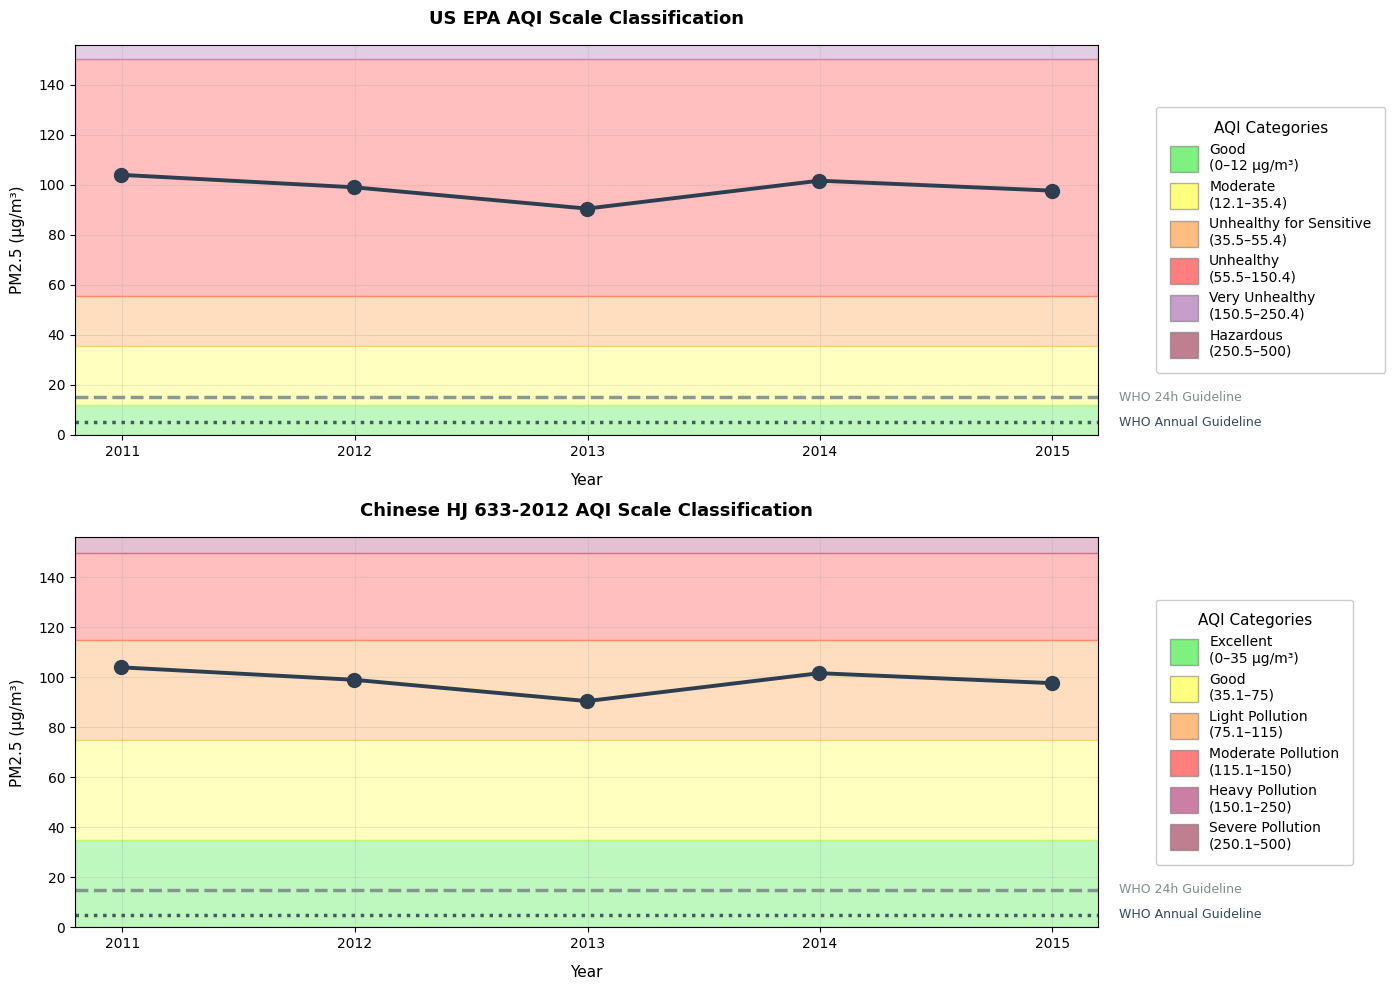

In [ ]:
# ===== DATA PREPARATION =====
# Assuming 'data' is your DataFrame with PM2.5 time series data
annual_avg = data['PM2.5'].resample('Y').mean()
who_annual = 5
who_daily = 15

# Create figure with adjusted proportions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Common parameters
y_max = min(annual_avg.max() * 1.5, 500)  # Extended to 500
line_args = {'marker':'o', 'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.8, 'markersize':10, 'zorder':5}

# ===== US EPA AQI =====
epa_breaks = [0, 12, 35.4, 55.4, 150.4, 250.4, 500]  # Added 500
epa_categories = [
    'Good\n(0–12 µg/m³)',
    'Moderate\n(12.1–35.4)',
    'Unhealthy for Sensitive\n(35.5–55.4)',
    'Unhealthy\n(55.5–150.4)',
    'Very Unhealthy\n(150.5–250.4)',
    'Hazardous\n(250.5–500)'
]
epa_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

# ===== Chinese HJ 633-2012 AQI =====
chn_breaks = [0, 35, 75, 115, 150, 250, 500]  # Added 500
chn_categories = [
    'Excellent\n(0–35 µg/m³)',
    'Good\n(35.1–75)',
    'Light Pollution\n(75.1–115)',
    'Moderate Pollution\n(115.1–150)',
    'Heavy Pollution\n(150.1–250)',
    'Severe Pollution\n(250.1–500)'
]
chn_colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#99004c', '#7e0023']

# ===== PLOTTING FUNCTION =====
def create_aqi_plot(ax, breaks, colors, categories, title):
    # Enhanced background colors
    for i in range(len(breaks)-1):
        ax.axhspan(breaks[i], breaks[i+1], alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot data
    ax.plot(annual_avg.index, annual_avg.values, **line_args)

    # Add WHO guidelines
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.5, alpha=0.9)
    ax.annotate('WHO Annual Guideline',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=9, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.5, alpha=0.9)
    ax.annotate('WHO 24h Guideline',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=9, va='center')

    # Formatting
    ax.set_title(title, fontsize=13, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Force yearly ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Year', fontsize=11, labelpad=10)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=11, labelpad=10)

# ===== CREATE PLOTS =====
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'US EPA AQI Scale Classification')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Chinese HJ 633-2012 AQI Scale Classification')

# ===== ENHANCED LEGEND =====
def create_legend(ax, colors, categories):
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',  # Increased alpha
                    label=l) for c,l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.5),
                      fontsize=10,
                      title="AQI Categories",
                      title_fontsize=11,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.5)
    return legend

create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- PM2.5 annual averages consistently exceeded 90 µg/m³, peaking above 105 µg/m³.
- According to the **US EPA AQI**, these values are categorized as **Unhealthy** (55.5–150.4 µg/m³).
- The **Chinese HJ 633-2012 AQI** scale classifies them as **Light to Moderate Pollution**, showing a more lenient categorization.
- **WHO air quality guidelines** (5 µg/m³ annual, 15 µg/m³ daily) are far exceeded, with real-world values being ~10x higher.
- A noticeable drop in PM2.5 is seen in 2013, but the trend is not consistently improving over time.
- The comparison highlights how AQI interpretation can vary dramatically based on the adopted national standard.


---
####**Monthly PM2.5 Levels vs AQI Scales (US EPA & Chinese HJ 633-2012)**


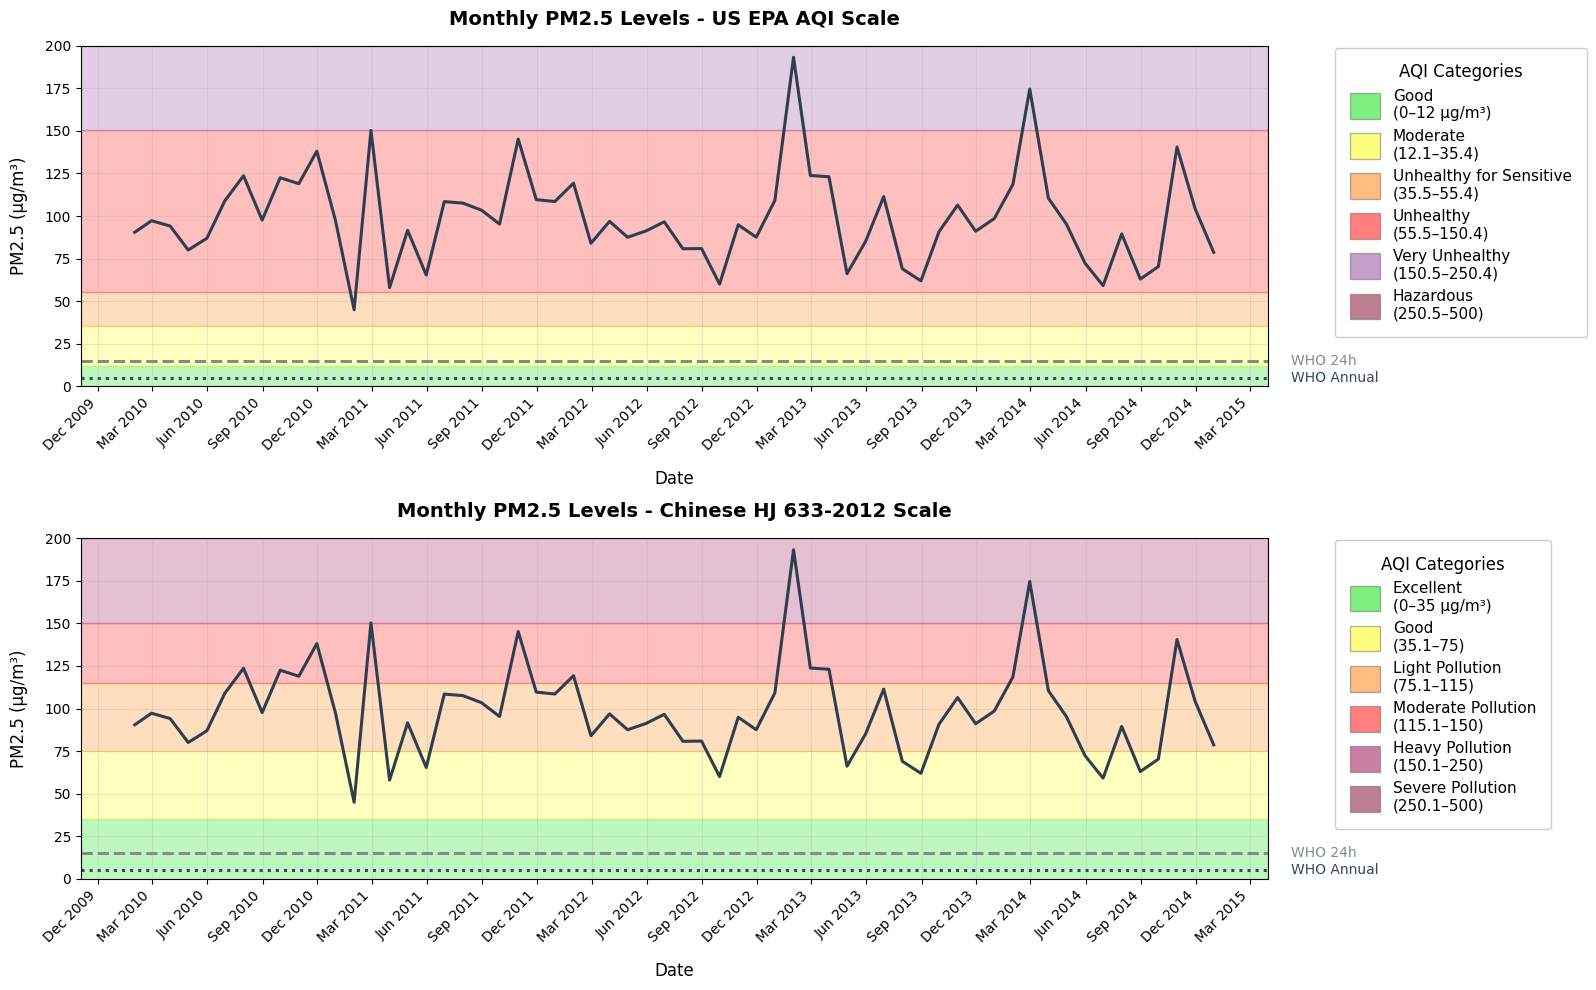

In [ ]:
# Data preparation
monthly_avg = data['PM2.5'].resample('M').mean()
who_annual = 5
who_daily = 15

# Create figure with adjusted proportions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Common parameters with fixed y-axis
y_max = 200
line_args = {'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.2, 'zorder':5}

def create_aqi_plot(ax, breaks, colors, categories, title):
    # Plot background up to y_max (200) but retain full break definitions
    for i in range(len(breaks)-1):
        lower = breaks[i]
        upper = breaks[i+1]
        if lower >= y_max:
            continue  # Skip breaks above the plot's y_max
        # Clip upper bound to y_max
        effective_upper = min(upper, y_max)
        ax.axhspan(lower, effective_upper, alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot monthly data
    ax.plot(monthly_avg.index, monthly_avg.values, **line_args)

    # Add WHO guidelines
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.2)
    ax.annotate('WHO Annual',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=10, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.2)
    ax.annotate('WHO 24h',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=10, va='center')

    # Formatting
    ax.set_title(title, fontsize=14, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.grid(True, alpha=0.3)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # More frequent ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Date', fontsize=12, labelpad=12)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=12, labelpad=12)

# Create plots
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'Monthly PM2.5 Levels - US EPA AQI Scale')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Monthly PM2.5 Levels - Chinese HJ 633-2012 Scale')

# Enhanced legend
def create_legend(ax, colors, categories):
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',
                    label=l) for c, l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.57),  # Adjust the y-coordinate here
                      fontsize=11,
                      title="AQI Categories",
                      title_fontsize=12,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.2)
    return legend

# Add legends
create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights**

- PM2.5 shows clear **seasonal peaks**, especially during winter months (e.g., early 2013, early 2014), likely due to heating-related emissions and atmospheric stagnation.
- Under the **US EPA AQI**, several months fall into the **“Very Unhealthy”** category, breaching 150 µg/m³.
- The **Chinese AQI scale** assigns the same values to **“Heavy Pollution”**, reflecting more lenient thresholds.
- Even in the cleanest months, levels consistently **exceed WHO limits** for both daily (15 µg/m³) and annual exposure (5 µg/m³).
- These plots emphasize both the **severity and persistence of PM2.5 pollution**, and how **standards shape interpretation** of air quality data.


---
####**Weekly PM2.5 Levels – US EPA vs Chinese AQI Classification**


In [ ]:
# ===== DATA PREPARATION =====
weekly_avg = data['PM2.5'].resample('W').mean()  # Weekly resampling
who_annual = 5
who_daily = 15

# Create figure with adjusted proportions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
plt.subplots_adjust(hspace=0.6, right=0.78)

# Common parameters
y_max = 300
line_args = {'linestyle':'-', 'color':'#2c3e50',
             'linewidth':2.0, 'zorder':5}


def create_aqi_plot(ax, breaks, colors, categories, title):
    # Background colors (clipped at y_max)
    for i in range(len(breaks)-1):
        lower = breaks[i]
        upper = breaks[i+1]
        if lower >= y_max:
            continue
        effective_upper = min(upper, y_max)
        ax.axhspan(lower, effective_upper, alpha=0.25,
                  color=colors[i], zorder=0, edgecolor='#ffffff')

    # Plot weekly data
    ax.plot(weekly_avg.index, weekly_avg.values, **line_args)

    # Add WHO guidelines
    ax.axhline(who_annual, color='#34495e', linestyle=':', linewidth=2.0)
    ax.annotate('WHO Annual',
               xy=(1.02, who_annual), xycoords=('axes fraction', 'data'),
               color='#34495e', fontsize=9, va='center')

    ax.axhline(who_daily, color='#7f8c8d', linestyle='--', linewidth=2.0)
    ax.annotate('WHO 24h',
               xy=(1.02, who_daily), xycoords=('axes fraction', 'data'),
               color='#7f8c8d', fontsize=9, va='center')

    # Formatting
    ax.set_title(title, fontsize=14, pad=15, fontweight='semibold')
    ax.set_ylim(0, y_max)
    ax.grid(True, alpha=0.3)

    # Date formatting for weekly data
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Tick every 2 months
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xlabel('Date', fontsize=12, labelpad=12)
    ax.set_ylabel('PM2.5 (µg/m³)', fontsize=12, labelpad=12)

# Create plots
create_aqi_plot(ax1, epa_breaks, epa_colors, epa_categories,
               'Weekly PM2.5 Levels - US EPA AQI Scale')
create_aqi_plot(ax2, chn_breaks, chn_colors, chn_categories,
               'Weekly PM2.5 Levels - Chinese HJ 633-2012 Scale')

# Legend function (same as monthly)
def create_legend(ax, colors, categories):
    patches = [Patch(facecolor=c, alpha=0.5, edgecolor='#666666',
                    label=l) for c, l in zip(colors, categories)]
    legend = ax.legend(handles=patches, loc='center left',
                      bbox_to_anchor=(1.05, 0.5),
                      fontsize=11,
                      title="AQI Categories",
                      title_fontsize=12,
                      framealpha=1,
                      borderpad=1,
                      handleheight=2.0)
    return legend

create_legend(ax1, epa_colors, epa_categories)
create_legend(ax2, chn_colors, chn_categories)

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights**

- Weekly data reveals **extreme volatility** in PM2.5, with frequent short-term pollution spikes.
- Under the **US EPA AQI**, many weeks are classified as **“Very Unhealthy” or even “Hazardous”**, signaling serious health risks.
- The **Chinese AQI scale** tends to classify the same levels more leniently (e.g., “Heavy” or “Moderate” pollution), which may downplay urgency.
- WHO 24h and annual guidelines are **consistently violated**, underscoring the intensity and regularity of air quality issues.
- This view confirms that high pollution is not only **seasonal** but also **episodic**, with **critical implications for respiratory health and emergency planning**.


---

###**1.3    SEASONALITIES IN THE DATA**
---

*To explore how pollution and meteorological variables behave over time, we analyze **hourly, weekly, and monthly** patterns. This helps us identify cyclical behaviors, which can guide feature engineering for better model performance.*

---


#### **Hourly Seasonality: PM2.5 and Weather Variables**

We compute the average **hourly trends** for the following variables, including confidence intervals:

We selected the following **four variables; PM2.5 concentration, temperature, dew point, and wind speed** because they significantly influence air quality and pollution dynamics, capturing key meteorological interactions that drive hourly fluctuations in pollutant dispersion and concentration.


- **PM2.5 Concentration**
- **Temperature (°C)**
- **Dew Point (°C)**
- **Wind Speed (m/s)**

This helps reveal short-term cyclical patterns over a typical day.


In [ ]:
def seasonal_mean(data, season_var, con_var):
    """
    Generates the mean of the seasonal period of choice, plus the upper and lower Confidence Intervals

    data: DataFrame containing the data
    season_var: Seasonal categorical variable - day/hour/month
    con_var: Continuous variable providing the "mean" reading of interest
    """

    mean_dict = dict(data.groupby(season_var)[con_var].mean())

    n = data.groupby(season_var)[con_var].count().mean()

    upper_dict = dict(data.groupby(season_var)[con_var].mean() +
                      1.96 * (data.groupby(season_var)[con_var].std() / ((n - 1) ** 0.5)))

    lower_dict = dict(data.groupby(season_var)[con_var].mean() -
                      1.96 * (data.groupby(season_var)[con_var].std() / ((n - 1) ** 0.5)))

    mean_data = pd.DataFrame([mean_dict, upper_dict, lower_dict]).transpose()
    mean_data.columns = ['mean', 'upper_CI', 'lower_CI']

    return mean_data

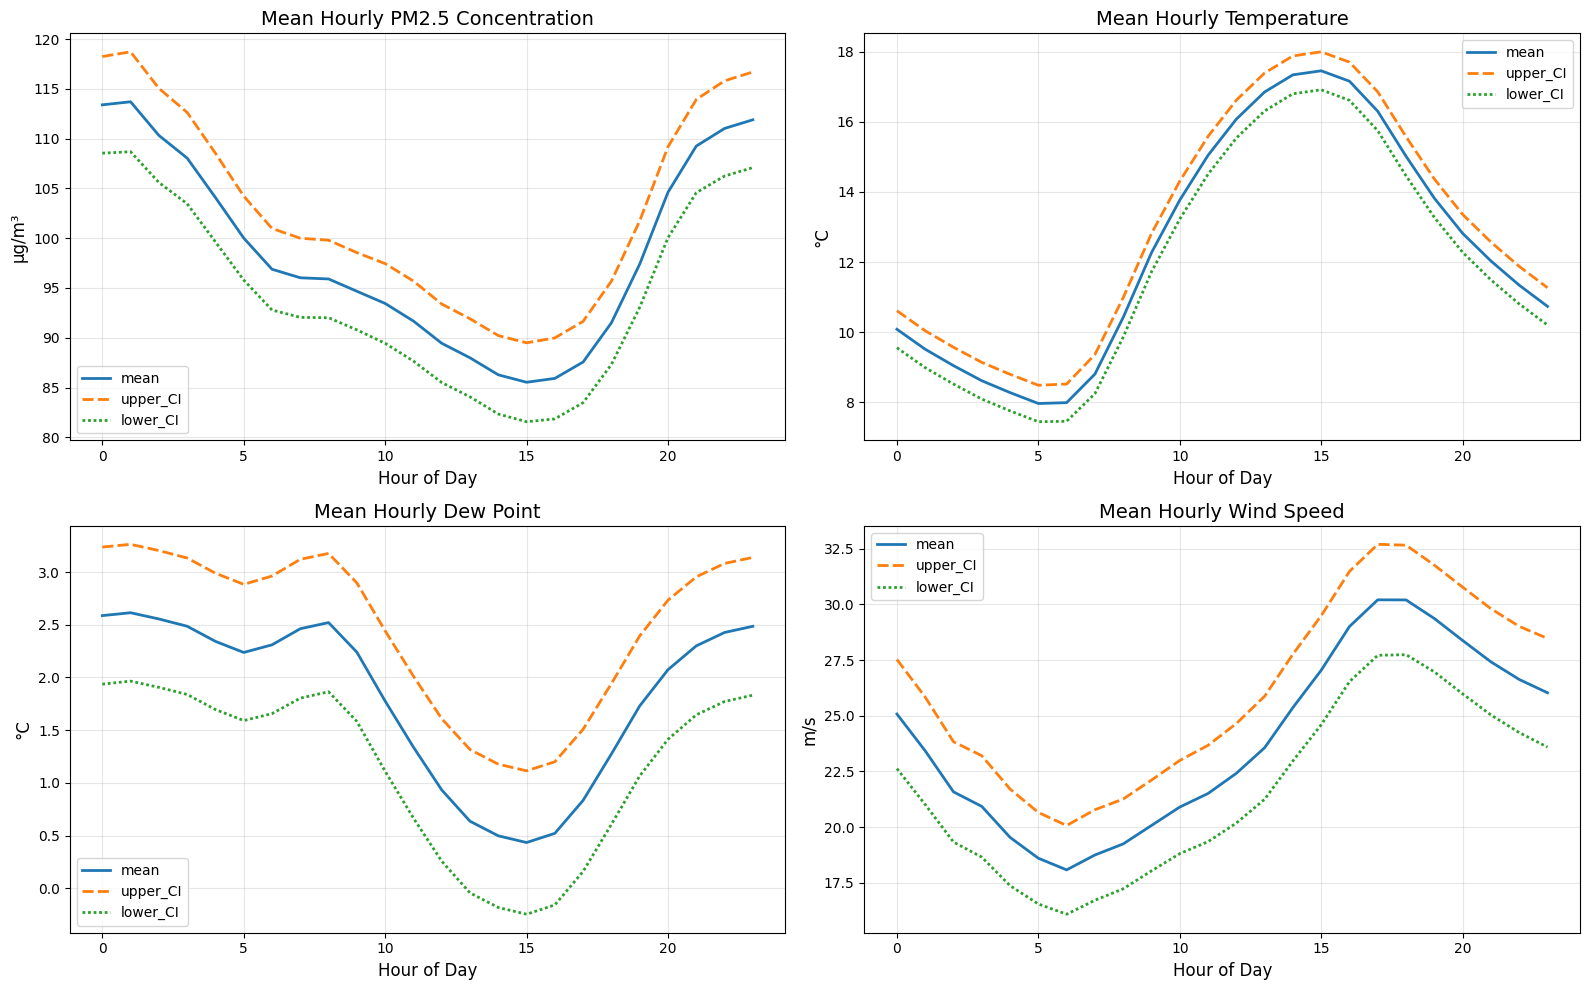

In [ ]:

def plot_hourly_avg(data, variable, title, ylabel, ax):
    """Plots hourly averages with confidence intervals on a specific subplot."""
    hourly_avg = seasonal_mean(data, 'Hour', variable)

    sns.lineplot(data=hourly_avg, linewidth=2, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Hour of Day', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.3)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot for PM2.5, Temperature, Dew Point, and Wind Speed on subplots
plot_hourly_avg(data, 'PM2.5', 'Mean Hourly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_hourly_avg(data, 'Temp', 'Mean Hourly Temperature', '°C', axes[0, 1])
plot_hourly_avg(data, 'DewP', 'Mean Hourly Dew Point', '°C', axes[1, 0])
plot_hourly_avg(data, 'WindSpeed', 'Mean Hourly Wind Speed', 'm/s', axes[1, 1])

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights**

- **PM2.5** follows a U-shaped curve, with peaks during night and evening hours, and a trough around midday — likely reflecting human activity and atmospheric dispersion.
- **Temperature** shows expected daytime peaks and nighttime drops.
- **Dew Point** and **Wind Speed** also show strong daily variability, with wind speed highest in the afternoon.

> Hourly fluctuations suggest **time of day** could be a useful feature, especially for short-term pollution prediction.


---
#### **Weekly Seasonality: PM2.5 and Weather Variables**

Similiar analysis to the previous section but now for **weekly cycles**.




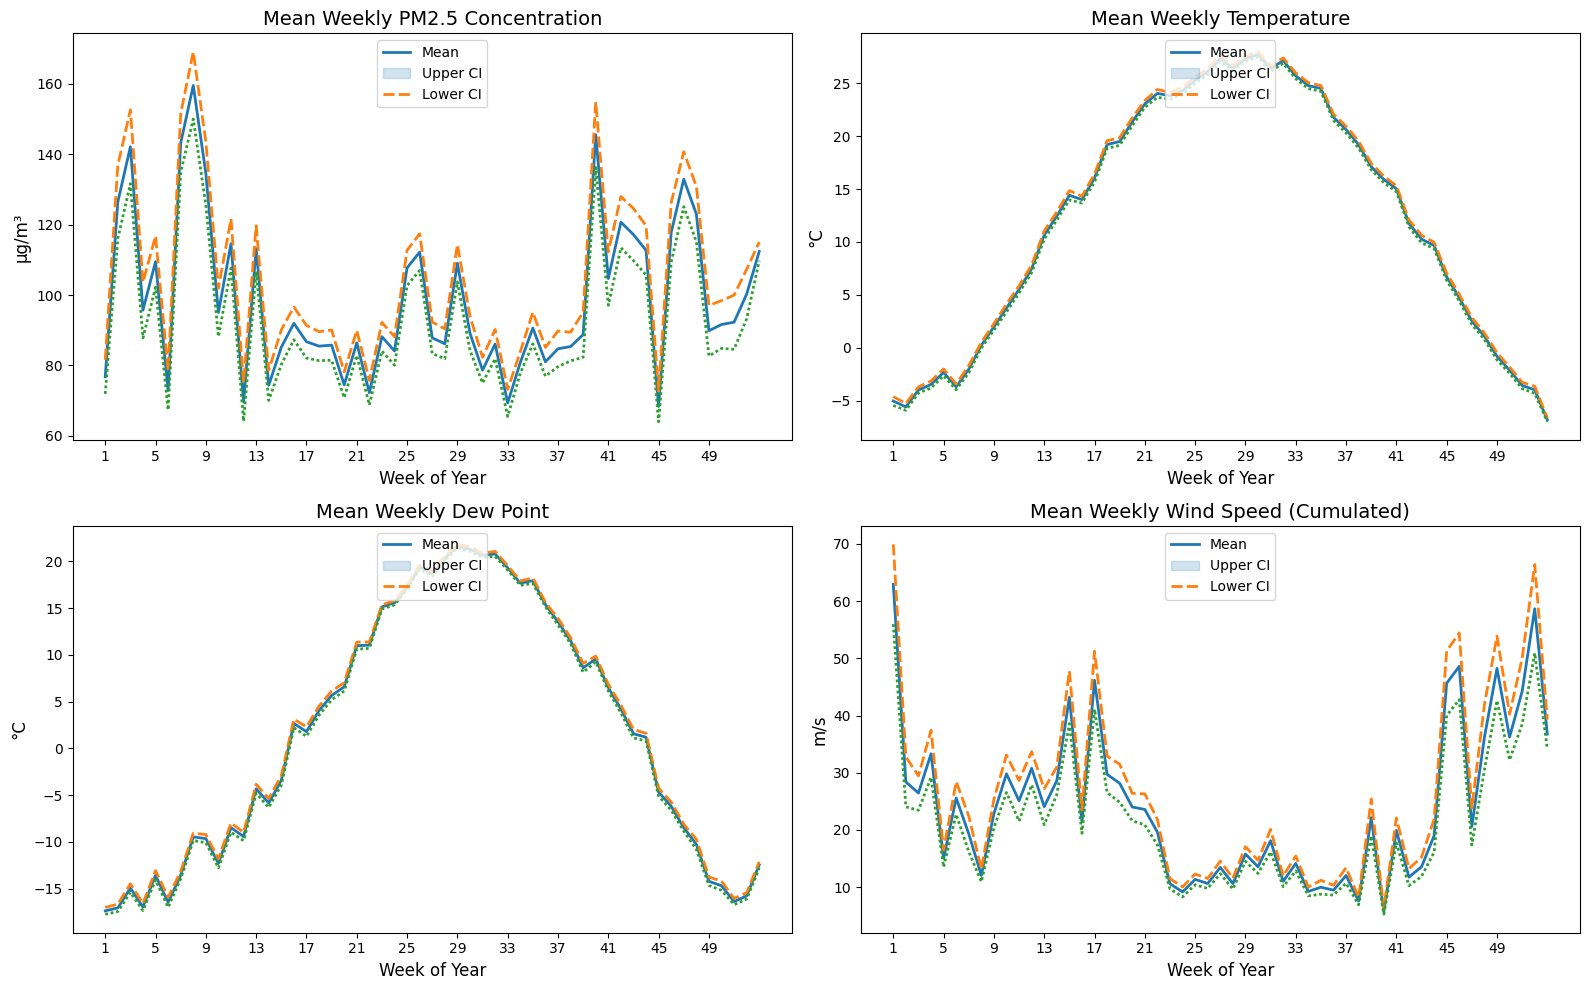

In [ ]:
# Calculate weekly averages for all variables
weekly_avg_PM25 = seasonal_mean(data, data.index.isocalendar().week, 'PM2.5')
weekly_avg_temp = seasonal_mean(data, data.index.isocalendar().week, 'Temp')
weekly_avg_dewp = seasonal_mean(data, data.index.isocalendar().week, 'DewP')
weekly_avg_iws = seasonal_mean(data, data.index.isocalendar().week, 'WindSpeed')

# Create a figure and a grid of subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Function to plot weekly data on a specific subplot
def plot_weekly_avg(data, variable, title, ylabel, ax):
    sns.lineplot(data=data, linewidth=2, ax=ax)
    ax.legend(loc='upper center', fontsize=10, labels=['Mean', 'Upper CI', 'Lower CI'])
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Week of Year', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks(range(1, 53, 4))  # Set ticks for every 4 weeks

# Plot data on each subplot
plot_weekly_avg(weekly_avg_PM25, 'PM2.5', 'Mean Weekly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_weekly_avg(weekly_avg_temp, 'Temp', 'Mean Weekly Temperature', '°C', axes[0, 1])
plot_weekly_avg(weekly_avg_dewp, 'DewP', 'Mean Weekly Dew Point', '°C', axes[1, 0])
plot_weekly_avg(weekly_avg_iws, 'WindSpeed', 'Mean Weekly Wind Speed (Cumulated)', 'm/s', axes[1, 1])

# Adjust spacing and display
plt.tight_layout()
plt.show()

---

#### 🔑 **Key Insights:**
- **PM2.5** levels are consistently elevated during winter weeks (approx. weeks 1–13 and 45–52), likely due to heating and poor dispersion.
- **Temperature and Dew Point** follow expected seasonal transitions, peaking mid-year.
- **Wind Speed** shows sharp weekly fluctuations with secondary peaks toward the year’s end.
- Weekly aggregation offers a **practical granularity** for incorporating seasonal shifts into modeling workflows.

---
#### **Monthly Seasonality: PM2.5 and Weather Variables**

Similar anaylsis as the previous section but now for **monthly averages**.



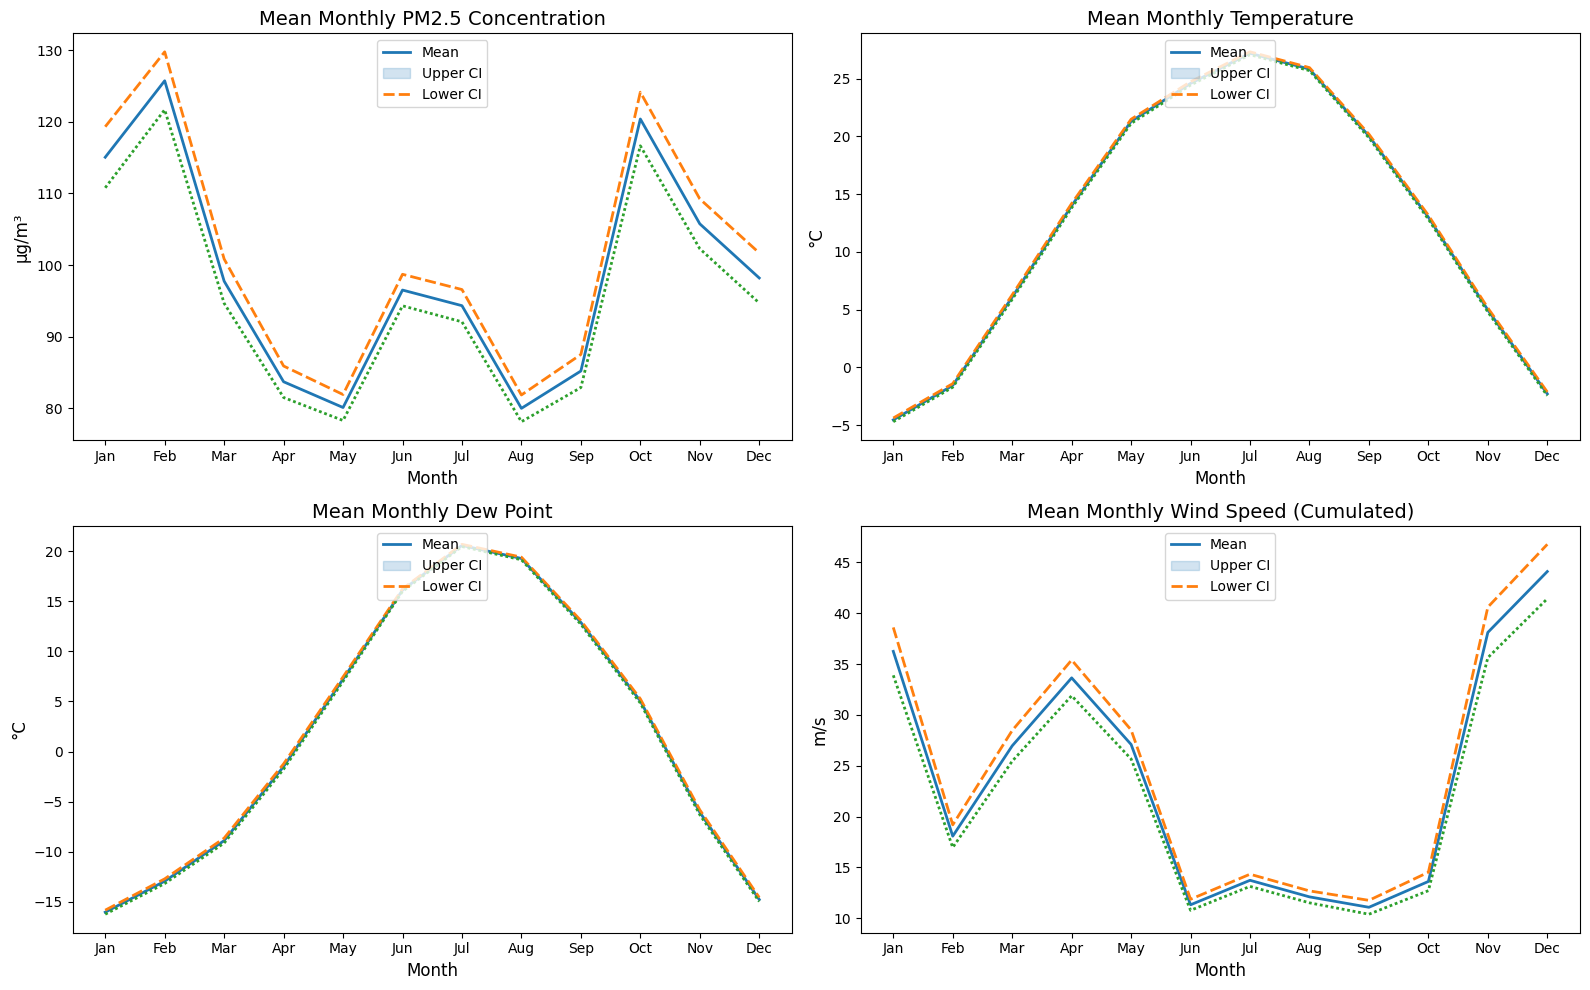

In [ ]:
# Calculate monthly averages for all variables
Month_avg_PM25 = seasonal_mean(data, 'Month', 'PM2.5')
Month_avg_temp = seasonal_mean(data, 'Month', 'Temp')
Month_avg_dewp = seasonal_mean(data, 'Month', 'DewP')
Month_avg_iws = seasonal_mean(data, 'Month', 'WindSpeed')

# Create a figure and a grid of subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Function to plot monthly data on a specific subplot
def plot_monthly_avg(data, variable, title, ylabel, ax):
    sns.lineplot(data=data, linewidth=2, ax=ax)
    ax.legend(loc='upper center', fontsize=10, labels=['Mean', 'Upper CI', 'Lower CI'])  # Smaller legend
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot data on each subplot
plot_monthly_avg(Month_avg_PM25, 'PM2.5', 'Mean Monthly PM2.5 Concentration', 'µg/m³', axes[0, 0])
plot_monthly_avg(Month_avg_temp, 'Temp', 'Mean Monthly Temperature', '°C', axes[0, 1])
plot_monthly_avg(Month_avg_dewp, 'DewP', 'Mean Monthly Dew Point', '°C', axes[1, 0])
plot_monthly_avg(Month_avg_iws, 'WindSpeed', 'Mean Monthly Wind Speed (Cumulated)', 'm/s', axes[1, 1])

# Adjust spacing and display
plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**
- **PM2.5** exhibits distinct winter peaks (Dec–Feb) and summer lows — in line with heating use and weather conditions.
- **Temperature and Dew Point** follow a smooth seasonal curve, peaking around July–August.
- **Wind Speed** has intermittent bursts, especially in spring and late autumn.
- These long-term cycles highlight **seasonal regularities** that can inform time-based feature engineering.

---
###**1.4    HANDLING MISSING VALUES in PM2.5**
---


Accurate imputation of missing data is critical for producing reliable models. In this section, we assess the temporal distribution of missing values in PM2.5, followed by a careful two-step imputation strategy:

- **Exploration**: Identify missing data patterns, especially before 2012.
- **Interpolation**: Within-day linear interpolation (morning and evening segments).
- **Imputation**: Median filling per hour, per month, per year for remaining missing values.
- **Validation**: Visual and statistical comparison of original and imputed distributions.

---

#### **Exploring Missing PM2.5 Data**

We begin by visualizing the percentage of missing PM2.5 values per month from 2010–2015. A major portion of the missing data occurs prior to 2012, as revealed in both line and bar plots.

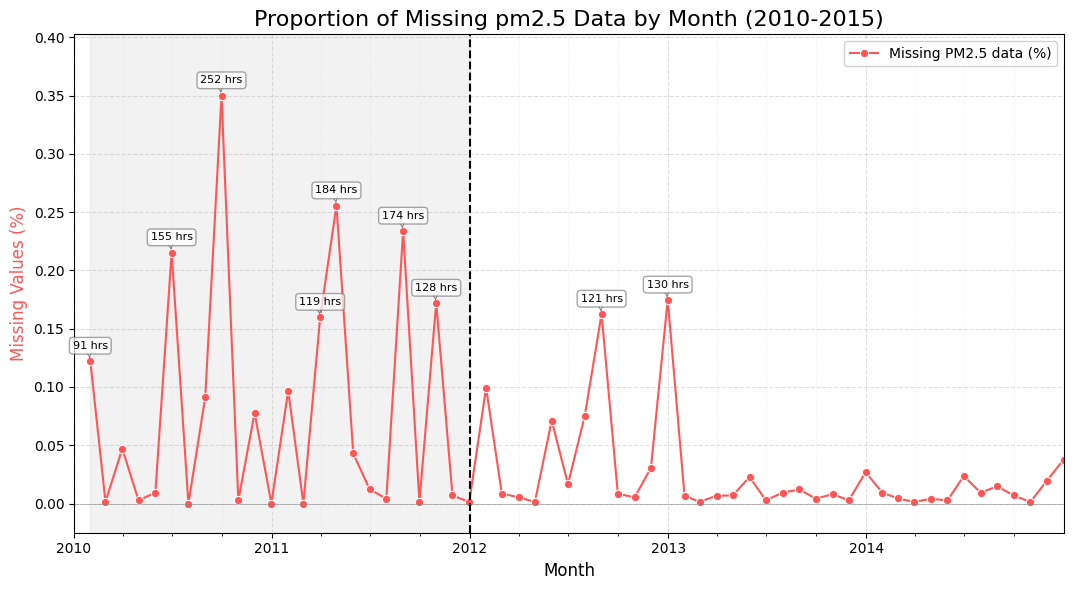

In [ ]:
# MISSING VALUES PER MONTH PLOT

# Missing data statistics
missing_by_month = data['PM2.5'].isnull().resample('ME').mean()
missing_hours_by_month = data['PM2.5'].isnull().resample('ME').sum() # Changed 'pm2.5' to 'PM2.5'

# Create the plot
fig, ax = plt.subplots(figsize=(11, 6))
sns.lineplot(x=missing_by_month.index, y=missing_by_month.values,
            marker='o', markersize=6, color='#FF5555', linewidth=1.5,
            ax=ax, label="Missing %")

# Styling and Annotations
ax.set_title('Proportion of Missing pm2.5 Data by Month (2010-2015)', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Missing Values (%)', fontsize=12, color='#FF5555')

max_value = missing_by_month.max()
ax.set_ylim(bottom=-0.025, top=max_value * 1.15)

cutoff_date = pd.to_datetime("2012-01-01")
ax.axvline(cutoff_date, color='black', linestyle='--', linewidth=1.5)
ax.axvspan(missing_by_month.index.min(), cutoff_date, alpha=0.1, color='gray')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.7, linewidth=0.5)

for date, pct, hrs in zip(missing_by_month.index, missing_by_month, missing_hours_by_month):
    if pct > 0.1:
        ax.annotate(
            text=f"{int(hrs)} hrs",
            xy=(date, pct),
            xytext=(date, pct + max_value * 0.03),
            ha='center',
            fontsize=8,
            arrowprops=dict(
                arrowstyle="->",
                color='gray',
                lw=0.7,
                connectionstyle="arc3,rad=0.1"
            ),
            bbox=dict(
                boxstyle="round,pad=0.3",
                fc="white",
                ec="gray",
                alpha=0.7
            )
        )

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=0)

# Ensure x-axis limits don't cut off data
start_date = data.index.min()
end_date = data.index.max()
ax.set_xlim(start_date, end_date)

ax.xaxis.set_minor_locator(mdates.MonthLocator([1, 4, 7, 10]))

plt.grid(True, which='major', linestyle='--', alpha=0.4)
plt.grid(True, which='minor', linestyle=':', alpha=0.2)

legend = ax.legend(
    ['Missing PM2.5 data (%)'],
    loc='upper right',
    framealpha=0.9,
    fontsize=10
)

plt.tight_layout()
plt.subplots_adjust(left=0.08, right=0.98)

plt.show()

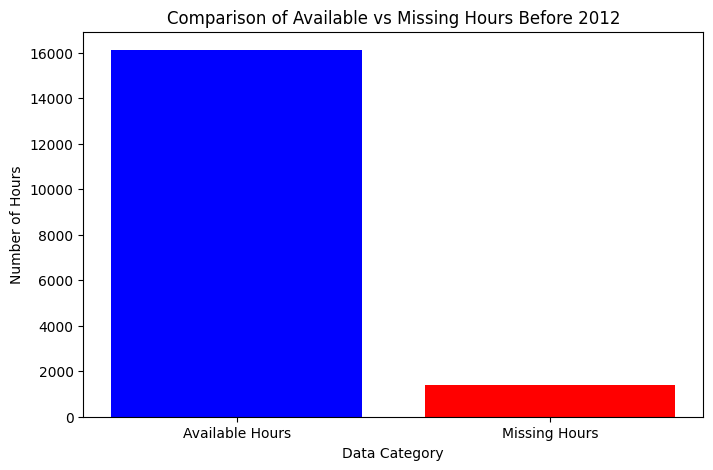

Total hours before 2012: 17520
Missing PM2.5 hours before 2012: 1397
Percentage of missing data: 7.97%


In [ ]:
# Filter data for before 2012
df_before_2012 = data[data['Year'] < 2012]

# Calculate total expected hours before 2012
total_hours_before_2012 = df_before_2012.shape[0]

# Calculate missing hours before 2012 in PM2.5
missing_hours_before_2012 = df_before_2012['PM2.5'].isnull().sum()

# Calculate percentage of missing hours
missing_percentage_before_2012 = (missing_hours_before_2012 / total_hours_before_2012) * 100

# Missing vs Available Hours Before 2012
plt.figure(figsize=(8, 5))
plt.bar(['Available Hours', 'Missing Hours'],
        [total_hours_before_2012 - missing_hours_before_2012, missing_hours_before_2012],
        color=['blue', 'red'])
plt.xlabel('Data Category')
plt.ylabel('Number of Hours')
plt.title('Comparison of Available vs Missing Hours Before 2012')
plt.show()


# Print results
print(f"Total hours before 2012: {total_hours_before_2012}")
print(f"Missing PM2.5 hours before 2012: {missing_hours_before_2012}")
print(f"Percentage of missing data: {missing_percentage_before_2012:.2f}%")

---

#### 🔑 **Key Insights:**

- Significant data gaps exist **before 2012**, with over **1300 missing hours**, amounting to nearly **8% of all hours** in that period.
- After 2012, missing values are rare and well-distributed.
- A major cluster of missing data is found at the **very start of 2010**, likely due to sensor initialization issues.
- Despite the early gaps, the **volume of valid data before 2012** remained substantial.
- **This informed our decision to retain the pre-2012 data and develop a tailored interpolation strategy to preserve valuable information.**



---

####**Interpolation Strategy (Morning & Evening)**

---

After reviewing the distribution of missing data, we chose to **retain the full dataset**, including the pre-2012 period with higher missing rates. To recover these gaps meaningfully, we applied a **multi-step imputation strategy** balancing temporal structure and data availability:

- **Drop fully-missing segments** (e.g., the first 24 hours of 2010).
- **Interpolate missing values within each day**, separately for morning and evening periods.
- **Fallback to median imputation per month/hour/year** where interpolation wasn’t possible.
- **Preserve the original values** and construct a unified `PM2.5_filled` variable for downstream modeling.

These steps aim to maximize data coverage while respecting diurnal and seasonal patterns in PM2.5 levels.

---

####**Dropping Fully Missing Day (January 1st, 2010)**


In [ ]:
# The very first day of the sample is missing the target variable
data.loc[(data.index.month==1) & (data.index.year==2010)].isnull().sum()

Year            0
Month           0
Day             0
Hour            0
DewP            0
Temp            0
Press           0
WinDir          0
WindSpeed       0
HoursOfSnow     0
HoursOfRain     0
PM2.5          91
dtype: int64

In [ ]:
# Dropped the first 24 rows (January 1, 2010, which is fully NaN)
data = data.iloc[24:]

The first day of the dataset (January 1, 2010) contains **no valid observations** for the PM2.5 variable. Since this block provides no usable information, we dropped it entirely to clean the dataset before interpolation.


---
####**Interpolation Within Each Day (Morning and Evening Split)**

To capture diurnal variability and avoid across-day interpolation distortion, PM2.5 data is interpolated within:
- Morning hours: 00:00–14:00
- Evening hours: 15:00–23:00  
This preserves intraday structure and avoids misleading interpolated trends.


In [ ]:
# Split into morning and evening time blocks
data_down = data.between_time("00:00", "14:00")
data_up = data.between_time("15:00", "23:00")

# Interpolate missing PM2.5 within each day, only inside the bounds
data_down['PM2.5_updown'] = data_down.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside'))

data_up['PM2.5_updown'] = data_up.groupby(['Year', 'Month', 'Day'])['PM2.5'].transform(
    lambda x: x.interpolate(method='linear', limit_area='inside'))

# Merge morning and evening datasets back into one full dataset
data = pd.concat([data_down, data_up])
data.sort_index(inplace=True)


###Create One Column with Day-Level Interpolation as Primary Data
# Use interpolated values where available, fall back to original otherwise
data['PM2.5_daily_interpol'] = data['PM2.5_updown'].combine_first(data['PM2.5'])

In [ ]:
# Check the null data
data.isnull().sum()

Year                       0
Month                      0
Day                        0
Hour                       0
DewP                       0
Temp                       0
Press                      0
WinDir                     0
WindSpeed                  0
HoursOfSnow                0
HoursOfRain                0
PM2.5                   2043
PM2.5_updown            1821
PM2.5_daily_interpol    1821
dtype: int64


---
####**Final Imputation: Median by Year-Month-Hour**

For any remaining missing values after interpolation, we perform **median imputation** grouped by:
- **Year**
- **Month**
- **Hour**

This preserves seasonal and temporal patterns specific to each year.


In [ ]:
data['PM2.5_imp_10'] = data[data.index.year==2010].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_11'] = data[data.index.year==2011].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_12'] = data[data.index.year==2012].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_13'] = data[data.index.year==2013].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

In [ ]:
data['PM2.5_imp_14'] = data[data.index.year==2014].groupby(['Month', 'Hour'])['PM2.5_daily_interpol'].transform(lambda x:
                                                                                             x.fillna(x.median()))

---

####**Finalizing Imputation & Cleaning Temporary Columns**

After applying both **interpolation** (day-level) and **groupwise median imputation** (year/month/hour), we created a single unified column:  
`PM2.5_filled`, which merges all valid estimates while preserving the original values where available.

- This column serves as the final, fully populated target variable for modeling and analysis.
- All intermediate columns used for the imputation process (`PM2.5_daily_interp`, `PM2.5_updown`, yearly imputation columns, etc.) were dropped to simplify the dataset.

We confirmed there are **no remaining missing values** in the cleaned dataset.


In [ ]:
data['PM2.5_filled'] = (
    data['PM2.5_imp_10']
    .combine_first(data['PM2.5_imp_11'])
    .combine_first(data['PM2.5_imp_12'])
    .combine_first(data['PM2.5_imp_13'])
    .combine_first(data['PM2.5_imp_14'])
)

In [ ]:
data.isnull().sum()

Year                        0
Month                       0
Day                         0
Hour                        0
DewP                        0
Temp                        0
Press                       0
WinDir                      0
WindSpeed                   0
HoursOfSnow                 0
HoursOfRain                 0
PM2.5                    2043
PM2.5_updown             1821
PM2.5_daily_interpol     1821
PM2.5_imp_10            35064
PM2.5_imp_11            35040
PM2.5_imp_12            35016
PM2.5_imp_13            35040
PM2.5_imp_14            35040
PM2.5_filled                0
dtype: int64

In [ ]:
# Define columns to drop
cols_to_drop = [col for col in data.columns if 'PM2.5_imp_' in col or 'PM2.5_daily_' in col or 'PM2.5_updown' in col]

data.drop(columns=cols_to_drop, inplace=True)
print(data.columns)


Index(['Year', 'Month', 'Day', 'Hour', 'DewP', 'Temp', 'Press', 'WinDir',
       'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'PM2.5', 'PM2.5_filled'],
      dtype='object')


---

####**Validation: Imputed vs. Original Data**

We validate the imputed data using:

- **Distribution comparisons** (full dataset + zoom in on 2010 subset)
- **Violin plots by year** + **Descriptive statistics** (mean, median, IQR)




In [ ]:
# # Comparison for Year
# plt.figure(figsize=(12,6))
# sns.kdeplot(data['PM2.5'], color='red', label='Filled', fill=True)
# sns.kdeplot(data['PM2.5_filled'], color='black', label='Original', fill=True)
# plt.title('Distribution Comparison: Original vs Filled', fontsize=20, pad=20)
# plt.xlabel('PM2.5 Concentration')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

# # Filter data for 2010
# data_2010 = data[data.index.year == 2010]

# # Comparison for Year 2010
# plt.figure(figsize=(12, 6))
# sns.kdeplot(data_2010['PM2.5'], color='red', label='Original', fill=True)
# sns.kdeplot(data_2010['PM2.5_filled'], color='black', label='Filled', fill=True)
# plt.title('Distribution Comparison: Original vs Filled (2010)', fontsize=20, pad=20)
# plt.xlabel('PM2.5 Concentration')
# plt.ylabel('Density')
# plt.legend()
# plt.show()

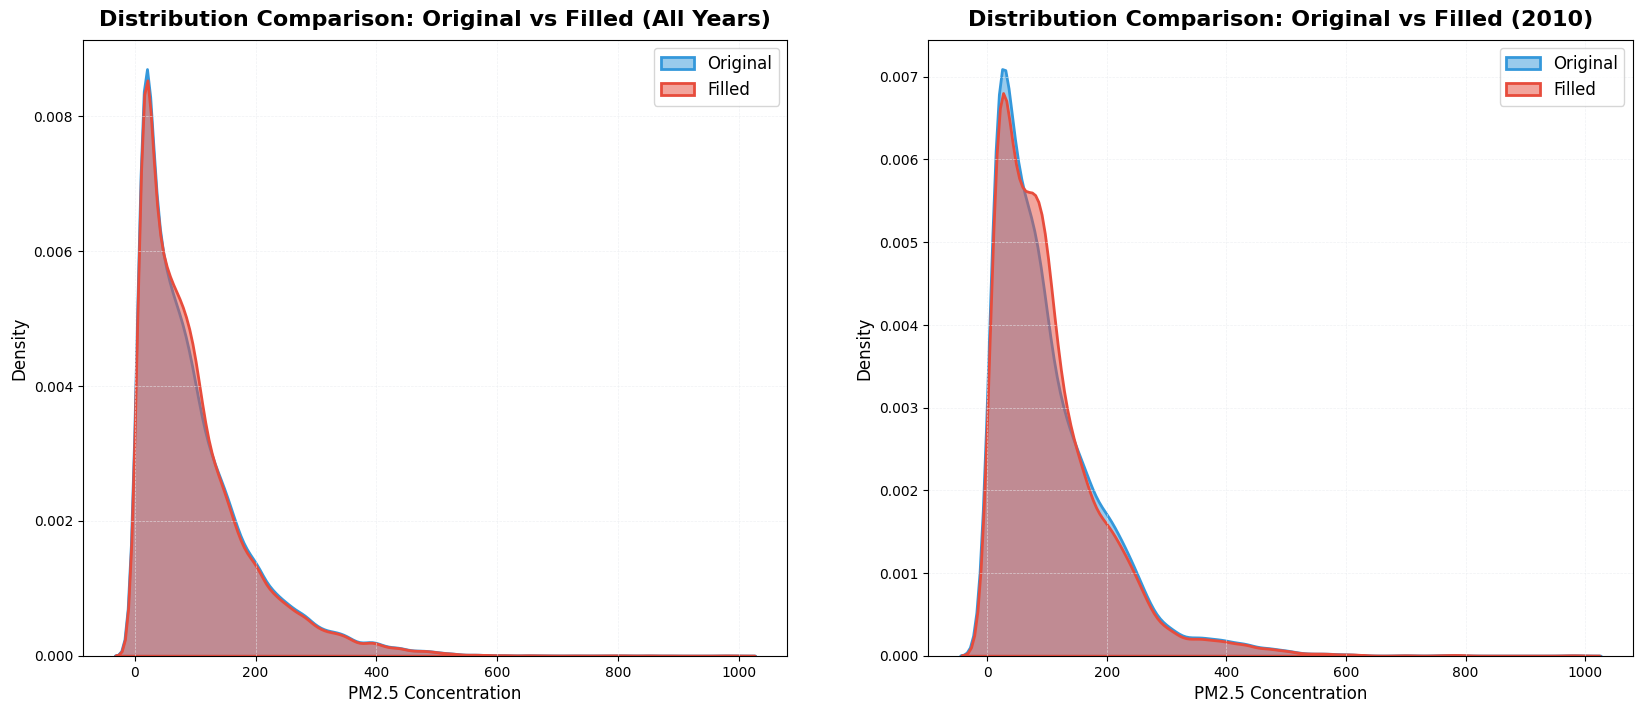

In [ ]:
color_original = '#3498db'
color_filled = '#e74c3c'
color_grid = '#e9ecef'
fig = plt.figure(figsize=(20, 8))
gs = GridSpec(1, 2, figure=fig)

# First subplot
ax1 = fig.add_subplot(gs[0, 0])
sns.kdeplot(data=data, x='PM2.5', color=color_original, label='Original',
            fill=True, alpha=0.5, linewidth=2, ax=ax1)
sns.kdeplot(data=data, x='PM2.5_filled', color=color_filled, label='Filled',
            fill=True, alpha=0.5, linewidth=2, ax=ax1)
ax1.set_title('Distribution Comparison: Original vs Filled (All Years)',
              fontsize=16, fontweight='bold', pad=10)
ax1.set_xlabel('PM2.5 Concentration', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.grid(color=color_grid, linestyle='--', linewidth=0.5, alpha=0.7)
ax1.tick_params(labelsize=10)
ax1.legend(fontsize=12)


# Second subplot
ax2 = fig.add_subplot(gs[0, 1])
year_to_plot = 2010
data_year = data[data.index.year == year_to_plot]
sns.kdeplot(data=data_year, x='PM2.5', color=color_original, label='Original',
                fill=True, alpha=0.5, linewidth=2, ax=ax2)
sns.kdeplot(data=data_year, x='PM2.5_filled', color=color_filled, label='Filled', fill=True, alpha=0.5, linewidth=2, ax=ax2)
ax2.set_title(f'Distribution Comparison: Original vs Filled ({year_to_plot})',
                  fontsize=16, fontweight='bold', pad=10)
ax2.set_xlabel('PM2.5 Concentration', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.grid(color=color_grid, linestyle='--', linewidth=0.5, alpha=0.7)
ax2.tick_params(labelsize=10)
ax2.legend(fontsize=12)
plt.show()

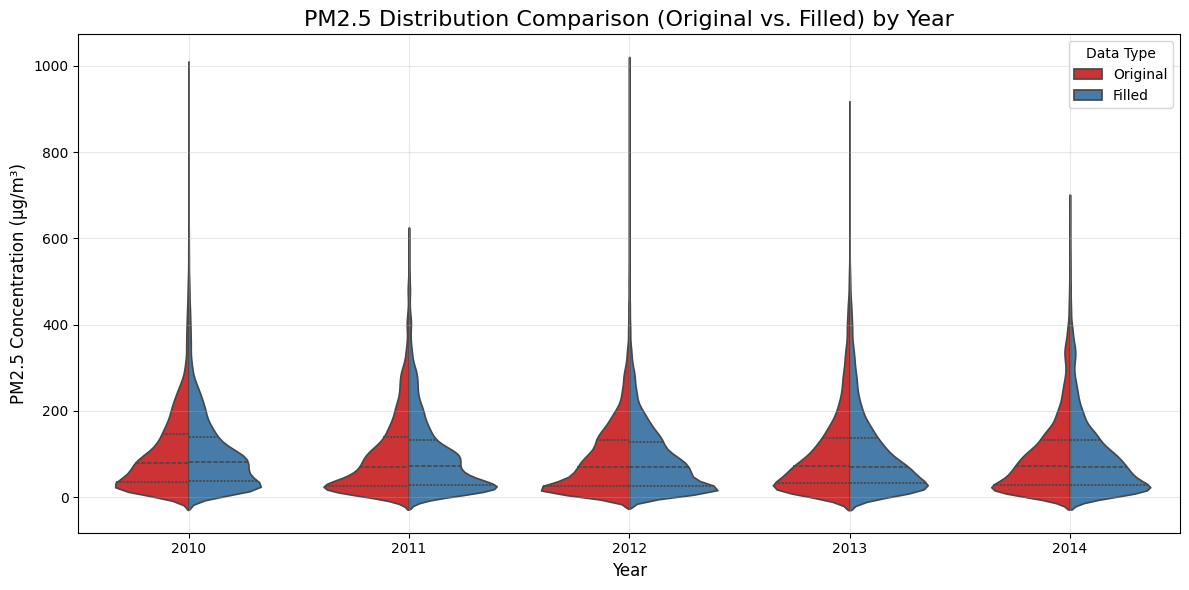


Correlation between PM2.5 and PM2.5_filled: 1.00


In [ ]:
# Violin Plots for Comparison Across Years

data['Year'] = data.index.year
df_melted = data.melt(id_vars=['Year'], value_vars=['PM2.5', 'PM2.5_filled'], var_name='Type', value_name='PM25_value')
df_melted['Type'] = df_melted['Type'].map({'PM2.5': 'Original', 'PM2.5_filled': 'Filled'})

# Plot violin plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set1")
sns.violinplot(x='Year', y='PM25_value', hue='Type', data=df_melted, split=True,
               palette=colors, inner='quartile')
plt.title('PM2.5 Distribution Comparison (Original vs. Filled) by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.legend(title='Data Type', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('yearly_distribution_comparison_violin.png')
plt.show()

pm25_stats = data[['PM2.5', 'PM2.5_filled']].describe().T
pm25_stats.index = ['Original PM2.5', 'Filled PM2.5']
pm25_styled = pm25_stats.style.format("{:.3f}").set_caption("<b><font size='4'>Descriptive Statistics for PM2.5 (Original vs. Filled)</font></b>")
display(pm25_styled)
correlation = data['PM2.5'].corr(data['PM2.5_filled'])
print(f"\n\033[1mCorrelation between PM2.5 and PM2.5_filled: {correlation:.2f}\033[0m")

---

#### 🔑 **Key Insights:**

- The **filled distribution closely follows** the original one, with near-identical statistical properties.
- Violin plots confirm that yearly distributional characteristics are preserved post-imputation.
- The **correlation between original and filled PM2.5** values is **1.00**, confirming fidelity.
- The strategy blends **temporal awareness** (daily cycles) with **robustness** (medians), ensuring reliable reconstruction without distortion.


---
###**1.5    OVERVIEW OF THE RELATIONSHIP BETWEEN NUMERICAL VARIABLES**
---



Before begining the feature engineering process, we explore the pairwise relationships between key numerical variables using pair plots and correlation matrices. This helps us assess potential feature importance, detect redundancies, and uncover non-linear or seasonal patterns.

We focus on the following variables:

- `PM2.5` and `PM2.5_filled`: Target variable (original and imputed)  
- `Temp`: Temperature  
- `Press`: Atmospheric Pressure  
- `WindSpeed`: Wind Speed  
- `DewP`: Dew Point  

These visual tools allow us to validate environmental dependencies and later inform our modeling and feature selection steps.


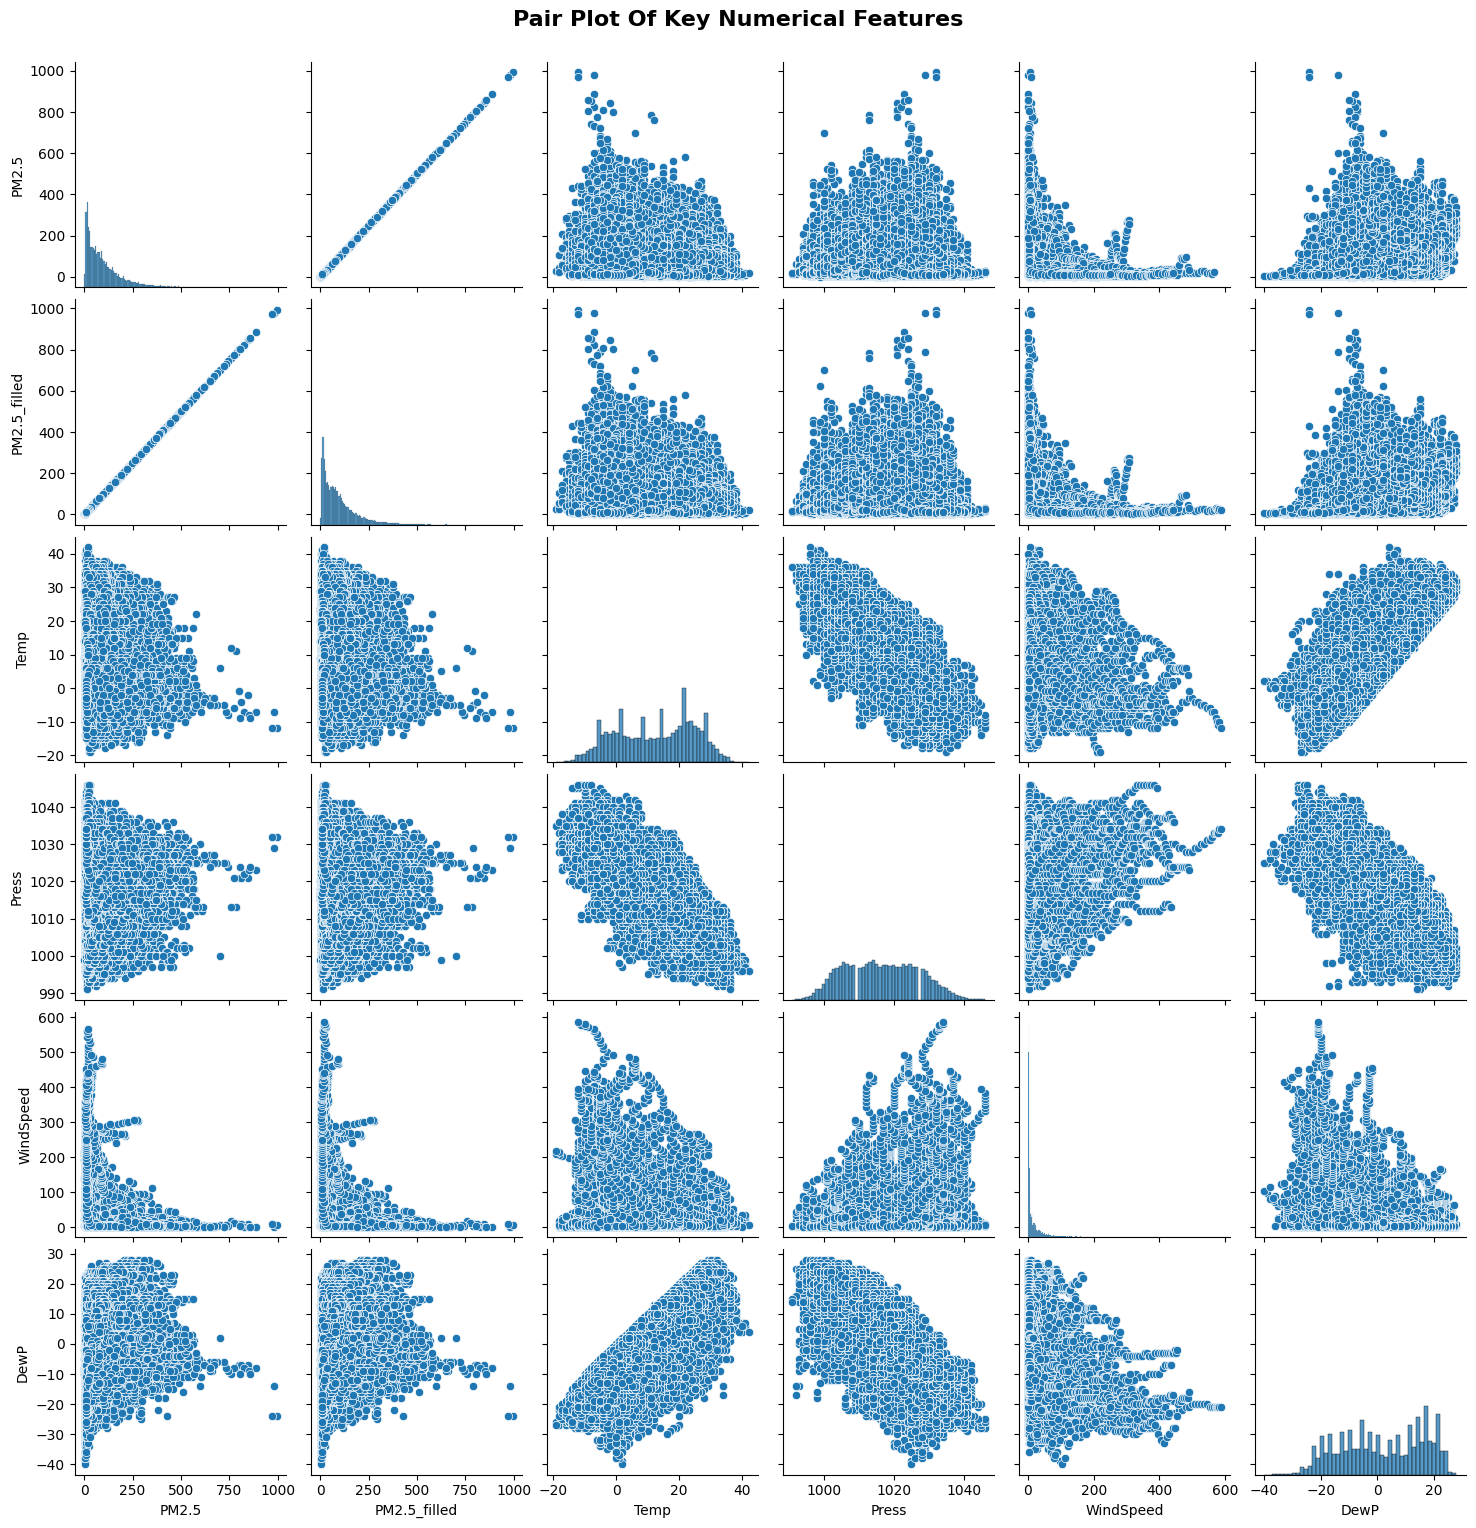

In [ ]:
# Pair plot for the most important numerous variables
numerical_variables = ['PM2.5', 'PM2.5_filled', 'Temp', 'Press', 'WindSpeed', 'DewP']
g = sns.pairplot(data[numerical_variables])
g.fig.suptitle("Pair Plot Of Key Numerical Features", fontsize=16, fontweight='bold', y=1.02)
plt.show()

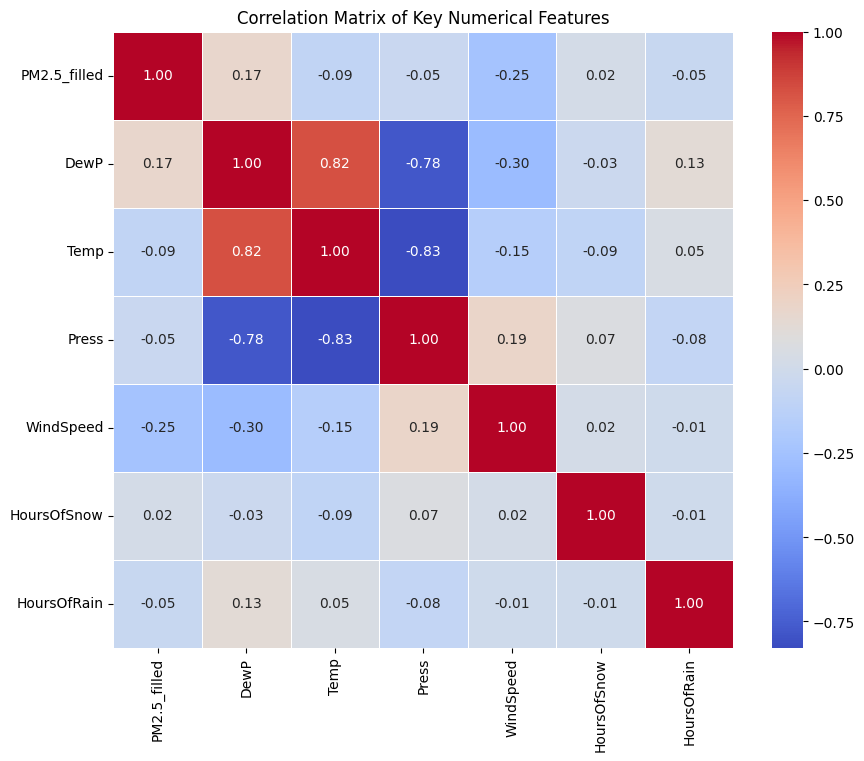

In [ ]:
# Select key numerical features for overview
numerical_features = ['PM2.5_filled', 'DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain']

# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()

---
#### 🔑 **Key Insights:**

- **PM2.5 vs Temperature**  
  - High **PM2.5** at **lower temperatures (<10°C)**, confirming winter pollution peaks.  
  - Likely linked to **coal burning** and **temperature inversions trapping pollutants**.  
  - **Non-linear trend**, suggesting other influencing factors.

- **PM2.5 vs Wind Speed**  
  - **Strong negative correlation**: High pollution occurs when **wind speeds are low (<5 m/s)**.  
  - **Extreme pollution spikes** appear near **0 m/s**, showing accumulation during stagnant conditions.

- **PM2.5 vs Atmospheric Pressure**  
  - **PM2.5 increases** with pressure up to ~**1025 hPa**, then **declines**.  
  - Indicates that **high-pressure systems** may trap pollutants, a typical winter pattern.

- **PM2.5 vs PM2.5_filled**  
  - Very **strong agreement** between original and imputed values.  
  - Confirms that our imputation process preserved the underlying distribution.


---

##**2.  FEATURE ENGINEERING** ##

---

This section contains:
- outliers/imbalance analysis and handling
- Encoding categorical features
- ..... Other forms of feature engineering......
- ...
-...

---
###**2.1. OUTLIER DETECTION AND TEMPORAL TRENDS**

---


In this section, we apply **two outlier detection techniques**—IQR and Z-score—on key environmental variables such as `PM2.5`, `Dew Point`, `Temperature`, `Pressure`, and `Wind Speed`. This helps us **identify anomalies** in the dataset and understand the overall distribution shape before feature normalization or modeling.

- **IQR Method**: Flags extreme values that fall outside 1.5× the interquartile range.
- **Z-score Method**: Detects statistical outliers based on deviation from the mean.

We then visualize the **daily trends and distributions** for each of these features using:
- **Scatter plots with 30-day rolling averages** (to reveal smoothed seasonal cycles),
- **Histograms + KDE curves** (to highlight skewness, modality, and value density).


In [ ]:
def detect_outliers(data, features):
    """
    Detects outliers using IQR and Z-score methods and returns a DataFrame with results.

    Args:
        data (pd.DataFrame): The input DataFrame.
        features (list): List of numerical features to check for outliers.

    Returns:
        pd.DataFrame: DataFrame with outlier information for each feature.
    """

    outlier_info = []

    for feature in features:
        if pd.api.types.is_numeric_dtype(data[feature]):
            # IQR Method
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound_iqr = Q1 - 2 * IQR
            upper_bound_iqr = Q3 + 2 * IQR
            outliers_iqr_count = len(data[(data[feature] < lower_bound_iqr) | (data[feature] > upper_bound_iqr)])

            # Z-score Method
            z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
            z_score_threshold = 3
            outliers_zscore_count = len(data[z_scores > z_score_threshold])

            outlier_info.append([feature, outliers_iqr_count, outliers_zscore_count])

    return pd.DataFrame(outlier_info, columns=["Feature", "IQR Outliers", "Z-score Outliers"])

# Example usage:
relevant_features = ['PM2.5', 'DewP', 'Temp', 'Press', 'WindSpeed']
outlier_results = detect_outliers(data, relevant_features)

# Display results in a formatted table
display(outlier_results)  # Using display to render as a table

Feature  IQR Outliers  Z-score Outliers
0      PM2.5           959               769
1       DewP             0                 0
2       Temp             0                 0
3      Press             0                 0
4  WindSpeed          4224              1163

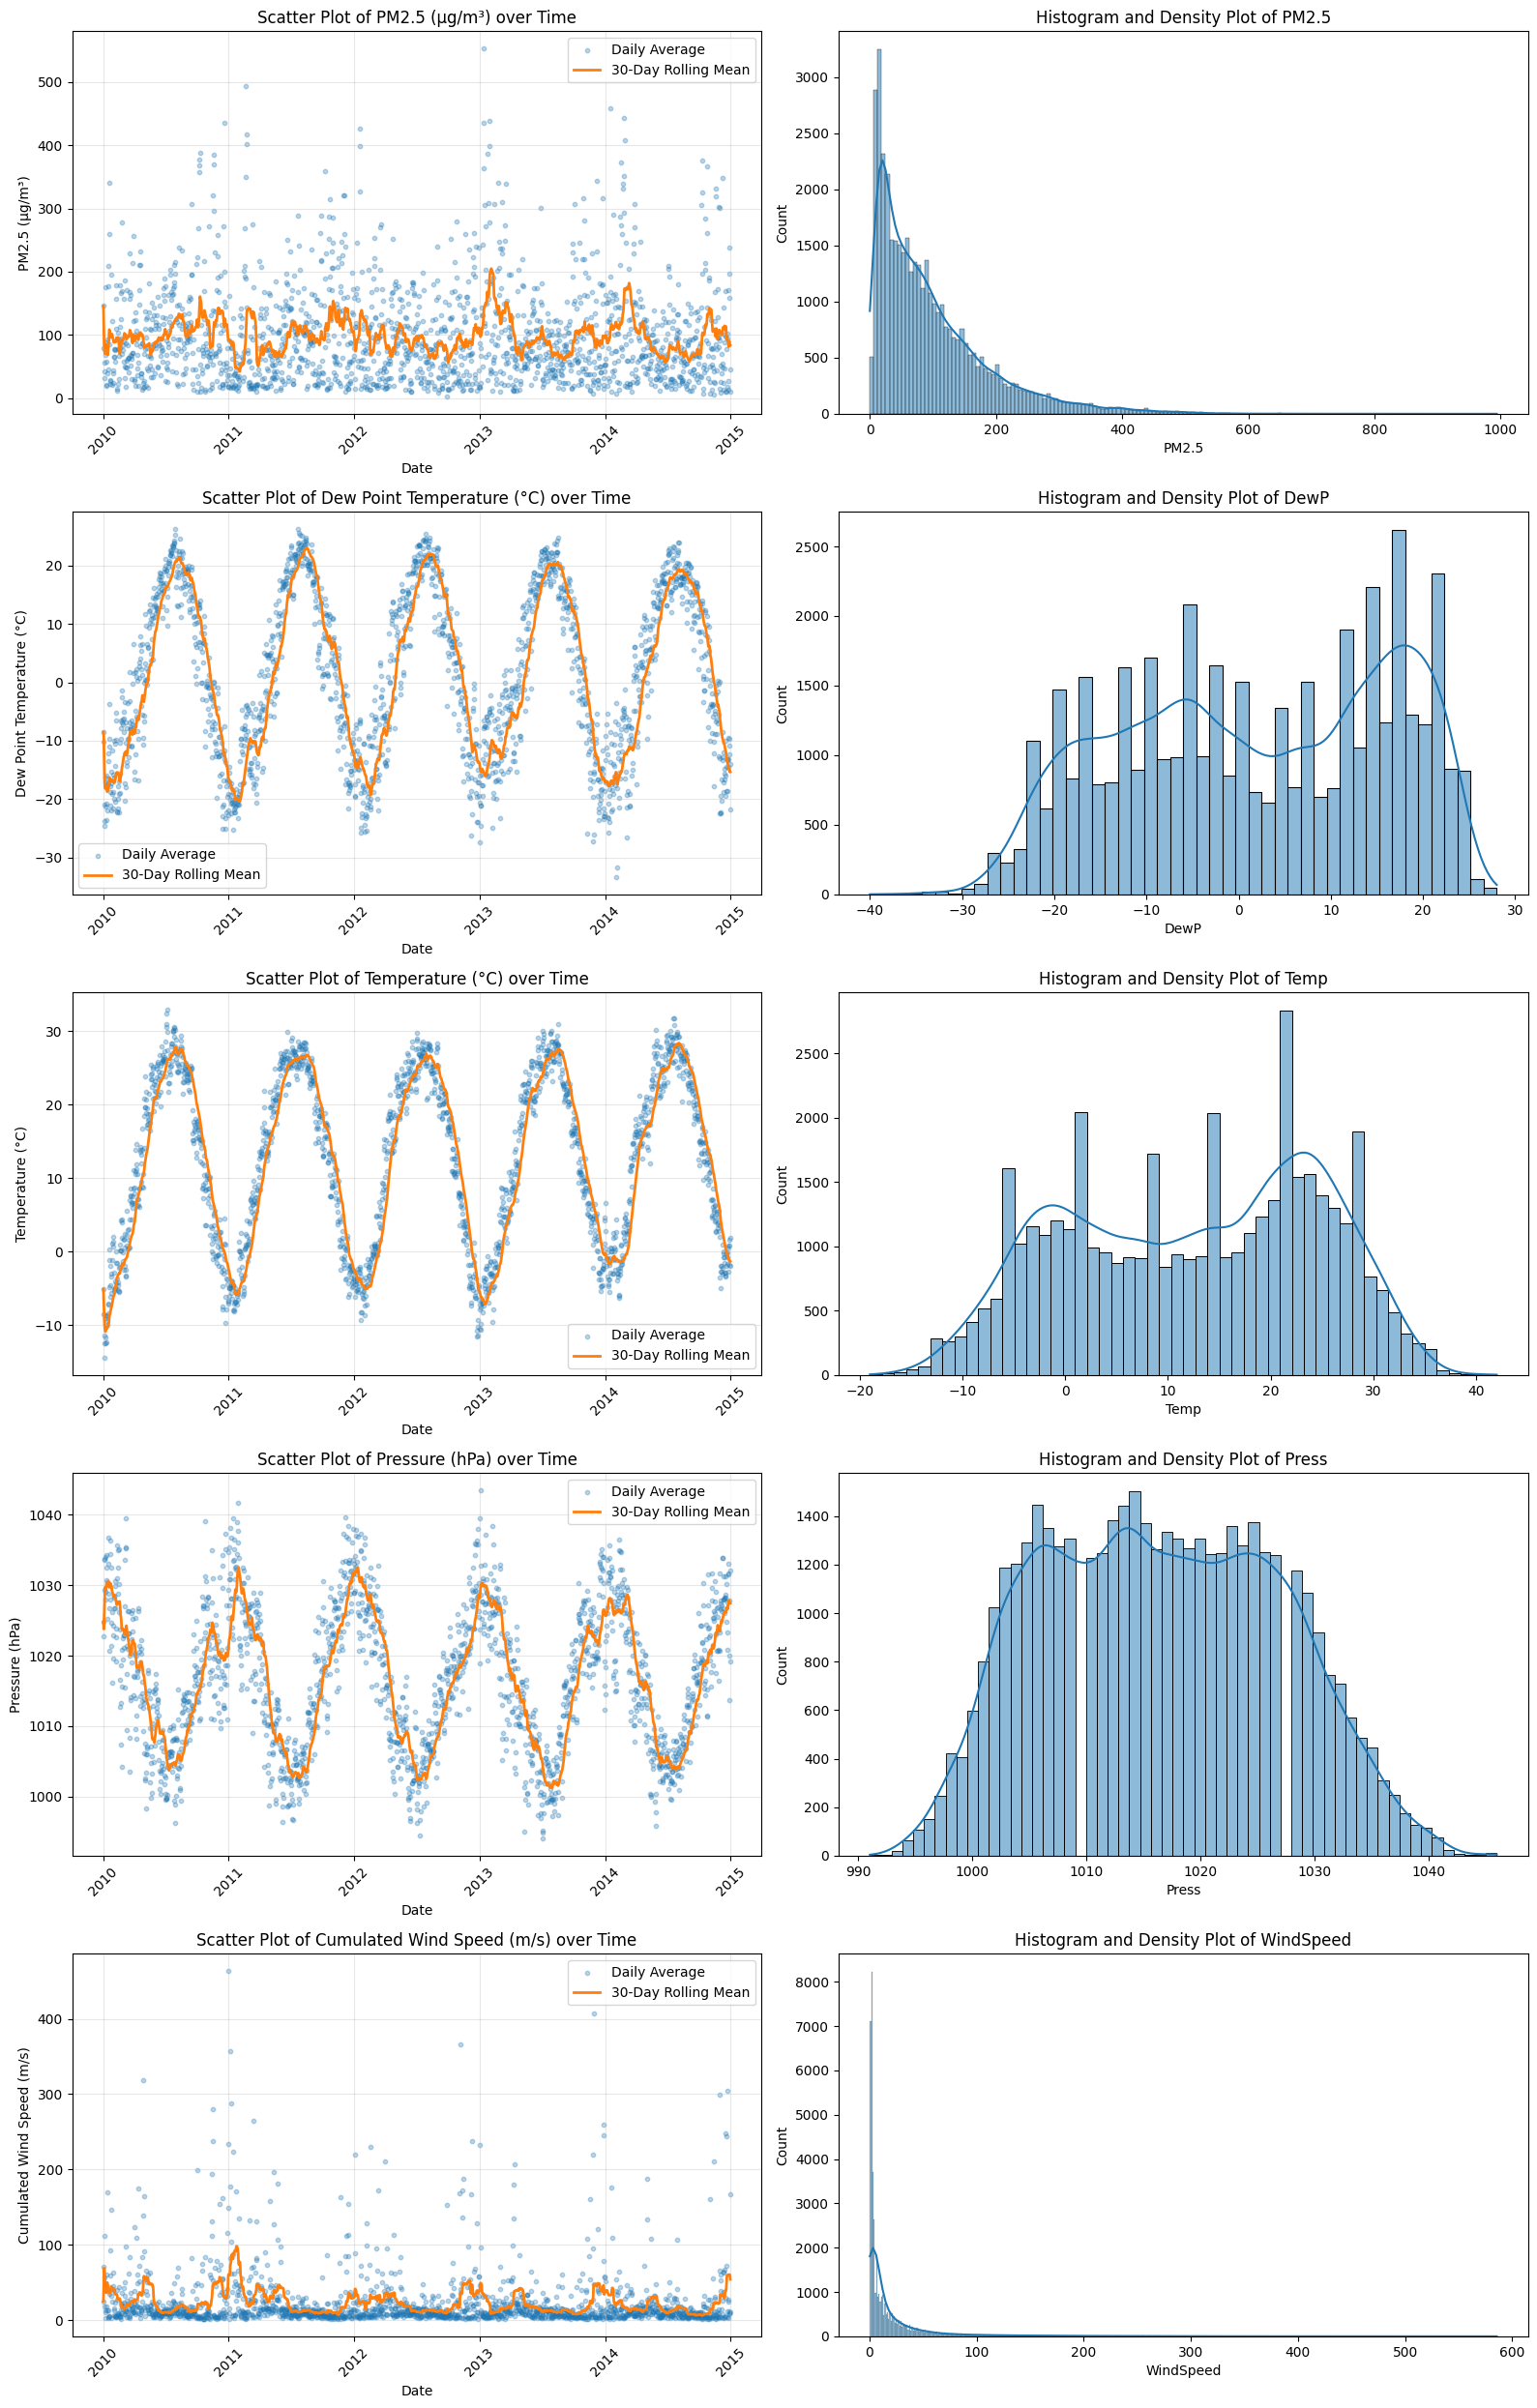

In [ ]:
# Define the features to plot (adjusted for Beijing PM2.5 dataset)
features = ['PM2.5', 'DewP', 'Temp', 'Press', 'WindSpeed']
feature_labels = {
    'PM2.5': 'PM2.5 (µg/m³)',
    'DewP': 'Dew Point Temperature (°C)',
    'Temp': 'Temperature (°C)',
    'Press': 'Pressure (hPa)',
    'WindSpeed': 'Cumulated Wind Speed (m/s)'
}

# Resample data to daily averages to reduce noise in scatter plots
data_daily = data[features].resample('D').mean()

# Create a figure and a grid of subplots
fig, axes = plt.subplots(len(features), 2, figsize=(16, 5 * len(features)))

# Custom colors
scatter_color = '#1f77b4'  # Blue for scatter
rolling_color = '#ff7f0e'  # Orange for rolling mean

# Loop through features and create plots
for i, feature in enumerate(features):
    # Scatter plot with daily averages
    axes[i, 0].scatter(data_daily.index, data_daily[feature], color=scatter_color, alpha=0.3, label='Daily Average', s=10)

   # Overlay a 30-day rolling mean to highlight trends
    rolling_mean = data_daily[feature].rolling(window=30, min_periods=1).mean()
    axes[i, 0].plot(data_daily.index, rolling_mean, color=rolling_color, label='30-Day Rolling Mean', linewidth=2)

    # Customize the scatter plot
    axes[i, 0].set_title(f'Scatter Plot of {feature_labels[feature]} over Time', fontsize=12)
    axes[i, 0].set_xlabel('Date', fontsize=10)
    axes[i, 0].set_ylabel(feature_labels[feature], fontsize=10)
    axes[i, 0].grid(True, alpha=0.3)
    axes[i, 0].legend(fontsize=10)

    # Format the x-axis for dates
    axes[i, 0].xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
    axes[i, 0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Histogram and density plot
    sns.histplot(data[feature], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram and Density Plot of {feature}')
    axes[i, 1].set_xlabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('feature_scatter_hist_plots.png')
plt.show()

---

#### 🔑 **Key Insights:**

- **PM2.5**:
  - Shows a right-skewed distribution, with a **significant number of extreme pollution events**.
  - IQR flags ~950 outliers, while Z-score detects over 750—these are crucial for air quality alerts.

- **WindSpeed**:
  - Most extreme in terms of outliers: over **4200 (IQR)** and **1100 (Z-score)**.
  - Many values are clustered near 0, but some spikes go above 400 m/s, which are likely **sensor errors or invalid data entries**. Requires cleaning.

- **Temperature, Pressure, Dew Point**:
  - Exhibit **strong seasonal sinusoidal patterns** over the 5-year timeline, confirmed by the **smooth rolling mean lines**.
  - Their histograms are generally symmetric, indicating well-behaved features with relatively **low outlier counts**.


> These exploratory plots not only help detect **data quality issues**, but also **reveal seasonal trends** that might be useful for feature engineering later on (e.g., via sin/cos encoding or rolling statistics).

>We shall now proceed by dealing with handling the outliers for ```PM2.5``` and ```WindSpeed```.



---
####**2.2. WINDSPEED OUTLIER WINSORIZATION**
---

In this section, we address **extreme WindSpeed values** using the **99th percentile** as a threshold for outliers, followed by **winsorization** to cap unrealistic spikes. We also explore how these outliers relate to other weather variables.


---

####**Visualizing Extreme WindSpeed Outliers**


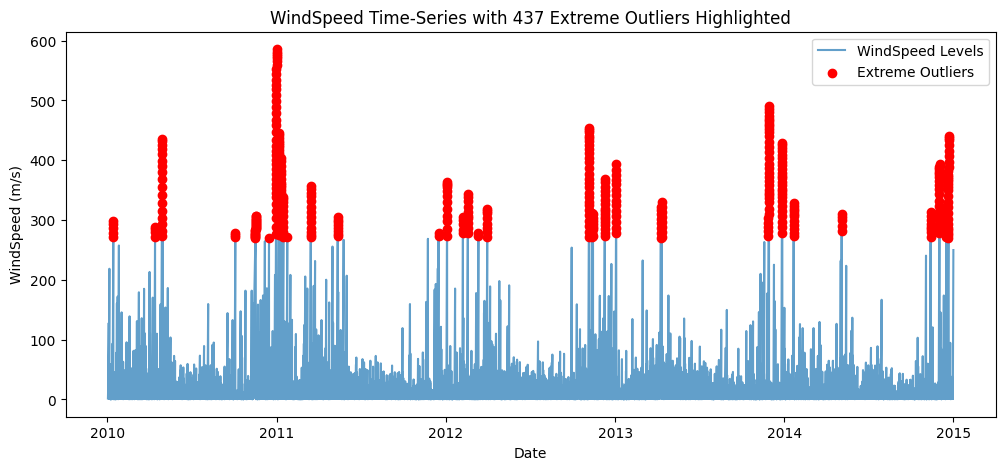

Threshold for extreme wind speeds (99th percentile): 269.12
Number of Extreme WindSpeed Outliers (WindSpeed > 269.12): 437
Proportion of extreme wind speeds: 1.00%


In [ ]:
# Step 1: Identify Extreme WindSpeed Outliers (e.g., WindSpeed > threshold)
threshold = data['WindSpeed'].quantile(0.99)  # using the 99th percentile
extreme_outliers_ws = data[data["WindSpeed"] > threshold]

# Step 2: Extract Relevant Data for Outlier Investigation (optional)
outlier_weather_stats_ws = extreme_outliers_ws[["WindSpeed", "Temp", "DewP", "PM2.5"]]

# Step 3: Visualize WindSpeed Over Time (Marking Extreme Outliers)
# Count the number of extreme outliers
extreme_outliers_ws_count = len(extreme_outliers_ws)

plt.figure(figsize=(12, 5))
plt.plot(data.index, data["WindSpeed"], label="WindSpeed Levels", alpha=0.7)
plt.scatter(extreme_outliers_ws.index, extreme_outliers_ws["WindSpeed"], color="red", label="Extreme Outliers", zorder=2)
plt.xlabel("Date")
plt.ylabel("WindSpeed (m/s)")
plt.title(f"WindSpeed Time-Series with {extreme_outliers_ws_count} Extreme Outliers Highlighted")
plt.legend()
plt.show()


#Use the 99th percentile as a cutoff for "very high" wind speeds
threshold = data['WindSpeed'].quantile(0.99)

# Filter rows that exceed this threshold
extreme_windspeed = data[data['WindSpeed'] > threshold]

# Calculate the proportion of extreme wind speed values
proportion_extreme = len(extreme_windspeed) / len(data) * 100

print(f"Threshold for extreme wind speeds (99th percentile): {threshold:.2f}")


print(f"Number of Extreme WindSpeed Outliers (WindSpeed > {threshold:.2f}): {extreme_outliers_ws_count}")
print(f"Proportion of extreme wind speeds: {proportion_extreme:.2f}%")

---
#### 🔑 **Key Insights:**
  - **437 records** flagged as extreme.
  - Most are **isolated spikes** reaching above **400–500 m/s**, highly implausible.

---
####**Winsorization of WindSpeed Values**

To handle extreme WindSpeed values, we apply a **winsorization technique** by capping all values above the **99th percentile (269.12 m/s)**.

- A new column `WindSpeed_Winsorized` is created.
- All values above the threshold are replaced with **269.12**, maintaining the structure while dampening extreme distortions.

**Purpose**: To reduce the influence of implausible spikes on downstream analysis while keeping the time-series structure intact.


In [ ]:
# Step 1: Calculate the 99th Percentile for WindSpeed Winsorization
# This is the threshold above which values will be capped.
winsor_limit_ws = data['WindSpeed'].quantile(0.99)
print(f"WindSpeed Winsorization threshold (99th percentile): {winsor_limit_ws:.2f}")

# Step 2: Apply Winsorization to the WindSpeed Variable
# Create a new column 'WindSpeed_Winsorized'. Values above winsor_limit_ws are replaced with winsor_limit_ws.
data['WindSpeed_Winsorized'] = np.where(data['WindSpeed'] > winsor_limit_ws, winsor_limit_ws, data['WindSpeed'])

WindSpeed Winsorization threshold (99th percentile): 269.12


---
####**Visual Comparison: Original vs Winsorized WindSpeed**


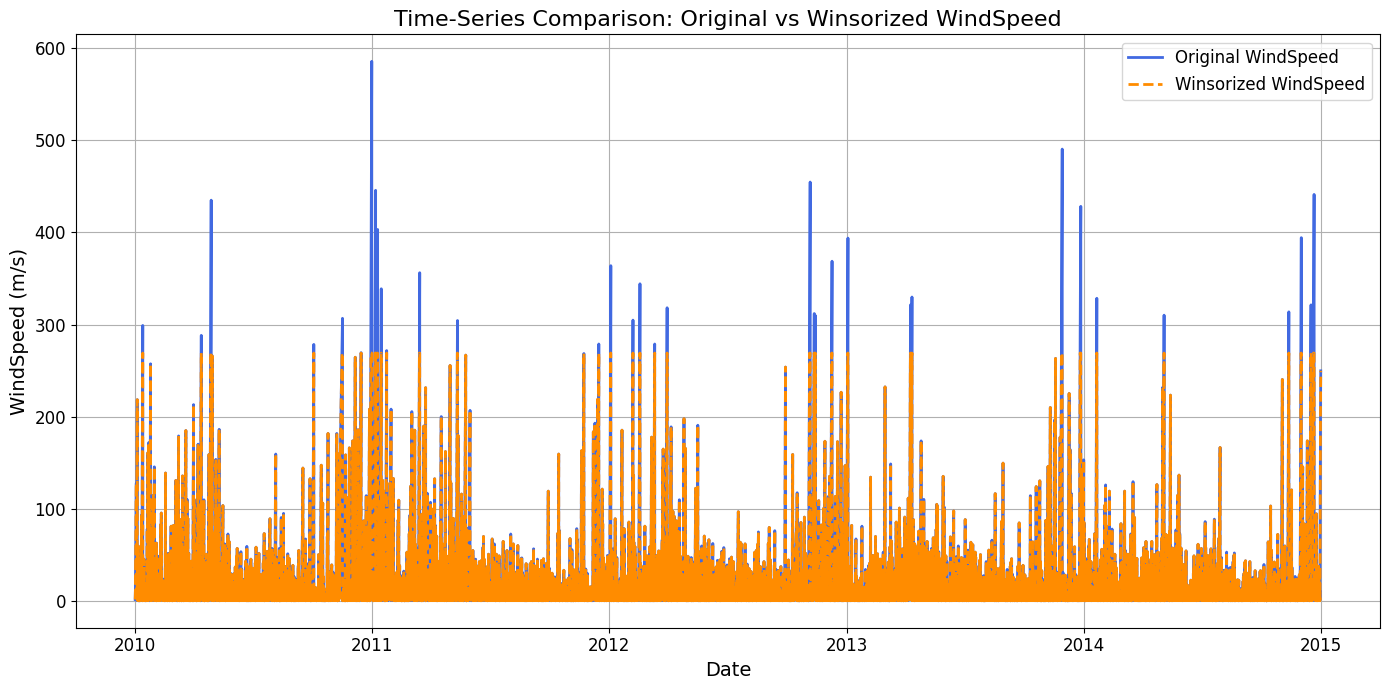

In [ ]:
# Visualize WindSpeed Over Time (Comparison)
plt.figure(figsize=(14, 7))

# Plot the original WindSpeed with a solid line in royal blue
plt.plot(data.index, data["WindSpeed"],
         label="Original WindSpeed",
         color='royalblue',
         linewidth=2)

# Plot the winsorized WindSpeed with a dashed line in dark orange
plt.plot(data.index, data["WindSpeed_Winsorized"],
         label="Winsorized WindSpeed",
         color='darkorange',
         linewidth=2,
         linestyle='--')

# Customize the labels and title
plt.xlabel("Date", fontsize=14)
plt.ylabel("WindSpeed (m/s)", fontsize=14)
plt.title("Time-Series Comparison: Original vs Winsorized WindSpeed", fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**
- **Original WindSpeed** (blue solid line): Preserves all raw values, including extreme spikes.
- **Winsorized WindSpeed** (orange dashed line): Caps extreme values at 269.12 m/s.
- **Temporal structure remains unchanged**, but volatility due to extreme events is reduced.
- Winsorization has allowed us to preserve **overall seasonal trends** and data continuity while curbing outlier influence—a practical approach for modeling and visualization.


---
####**2.3. PM2.5 OUTLIERS DETECTION AND FLAGGING**
---

In this section, we aim to:
- Identify unusually high PM2.5 concentrations.
- Understand their distribution over time.
- Flag them for modeling, or otherwise deal with them.
- Use signal decomposition (VMD) to detect and structure hidden patterns.


---
####**Year-wise Distribution of PM2.5 Levels**

We start by visualizing how PM2.5 concentrations vary across years using boxplots. This helps revealPersistent presence of high outliers across all years.


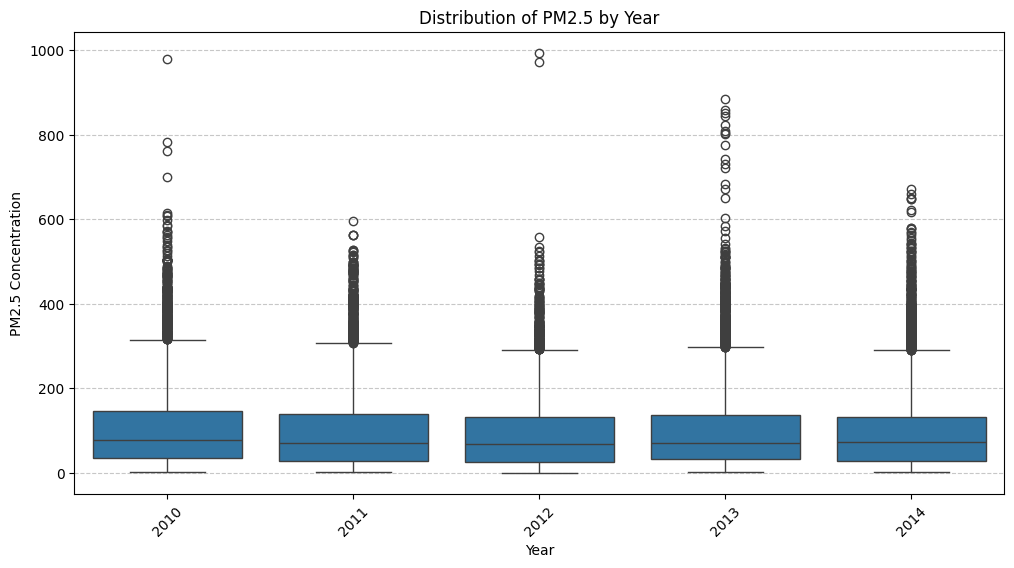

In [ ]:
# Visualize PM2.5 Distribution by Year

# Step 1: Extract year for visualization
data['Year'] = data.index.year

# Step 2: Plot PM2.5 distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['Year'], y=data['PM2.5'])

# Step 3: Improve visualization
plt.xlabel("Year")
plt.ylabel("PM2.5 Concentration")
plt.title("Distribution of PM2.5 by Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

#### 🔑 **Key Insights:**

* **Numerous outliers** across all years → values above 400 μg/m³ are frequent and represent significant pollution events.
* **2013 has the most extreme pollution events**, with some values exceeding 900 μg/m³.
* **IQR is stable**, indicating consistent baseline pollution patterns across years despite outliers.

---
####**Cumulative Distribution of PM2.5 Levels**

Here, we plot the Cumulative Distribution Function (CDF) of PM2.5 values to quantify the rarity of extreme events.


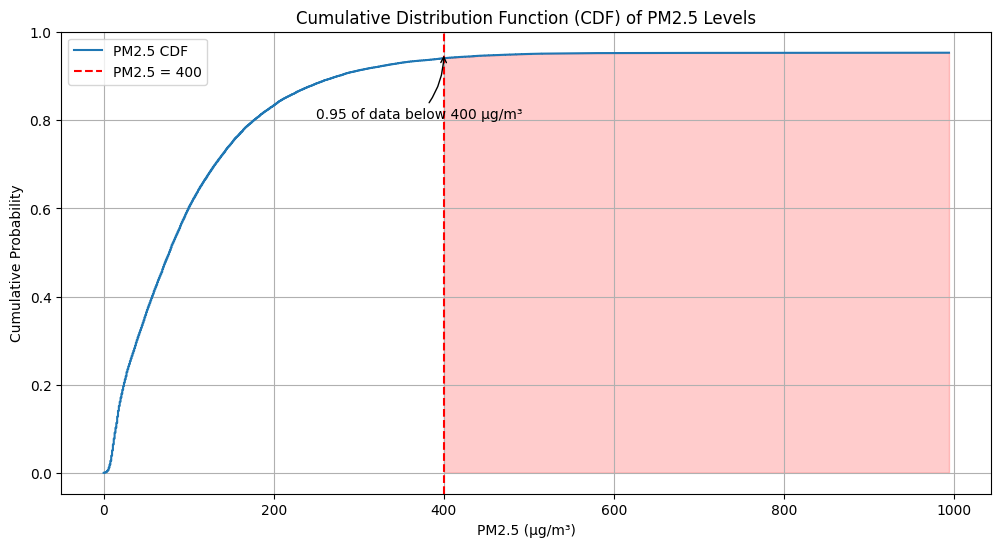

PM2.5 Range Percentage
0       0-200    83.224%
1     200-400    10.798%
2     400-600     1.189%
3     600-800     0.048%
4    800-1000     0.025%

In [ ]:
# Calculate the CDF
sorted_data = np.sort(data['PM2.5'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(sorted_data, cdf, label='PM2.5 CDF')

# Highlight the region above 400
plt.axvline(x=400, color='red', linestyle='--', label='PM2.5 = 400')
plt.fill_between(sorted_data, cdf, where=(sorted_data >= 400), color='red', alpha=0.2)

# Add labels and title
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF) of PM2.5 Levels")
plt.legend()
plt.grid(True)

# Calculate cdf_value_at_400
cdf_value_at_400 = cdf[np.abs(sorted_data - 400).argmin()]

# Add annotation for data below 400 with downward arrow and adjusted position on the LEFT
plt.annotate(f'{cdf_value_at_400:.2f} of data below 400 µg/m³',
             xy=(400, cdf_value_at_400),
             xytext=(250, cdf_value_at_400 - 0.15),  # Moved text to the LEFT and below the curve
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'))

# Show the plot with annotation
plt.show()

# Create and display the table
percentage_table = pd.DataFrame(percentage_data, columns=['PM2.5 Range', 'Percentage'])
display(percentage_table)

 ---
#### 🔑 **Key Insights:**
- 95% of PM2.5 values fall below 400 μg/m³.
- The remaining ~5% are the tail events.
- This gives us a principled reference point for distinguishing between typical and extreme pollution.

---
####**Flagging Extreme PM2.5 Outliers (> 700 μg/m³)**

Using a strict threshold of 700 μg/m³, we mark data points representing extreme pollution events.


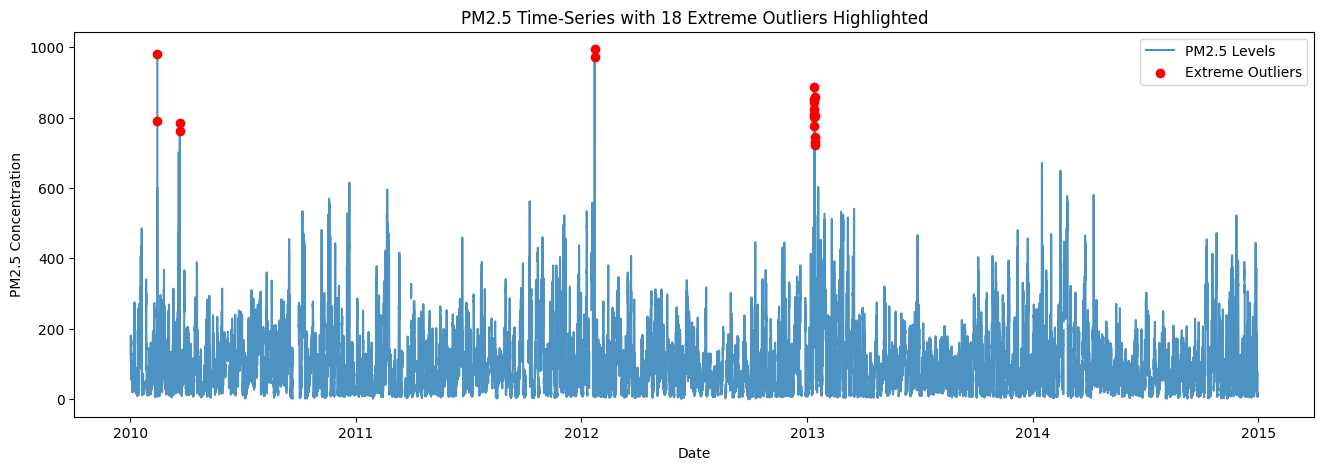

Number of Extreme Outliers (PM2.5_filled > 700 μg/m³): 18


In [ ]:
# Step 1: Identify possible PM2.5 Outliers (e.g., PM2.5 > 700 μg/m³)
extreme_outliers = data[data["PM2.5_filled"] > 700]

# Step 2: Extract Relevant Data for Outlier Investigation
outlier_weather_stats = extreme_outliers[["PM2.5_filled", "Temp", "DewP" , "WindSpeed"]]


# Step 3: Count the number of possible outliers
extreme_outliers_count = len(data[data["PM2.5_filled"] > 700])

# Step 4: Visualize PM2.5 Over Time (Marking Extreme Outliers)
plt.figure(figsize=(16, 5))
plt.plot(data.index, data["PM2.5"], label="PM2.5 Levels", alpha=0.8)
plt.scatter(extreme_outliers.index, extreme_outliers["PM2.5_filled"], color="red", label="Extreme Outliers", zorder=2)
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.title(f"PM2.5 Time-Series with {len(extreme_outliers)} Extreme Outliers Highlighted")
plt.legend()
plt.show()


# Step 5: Count the number of possible outliers
extreme_outliers_count = len(extreme_outliers)
print(f"Number of Extreme Outliers (PM2.5_filled > 700 μg/m³): {extreme_outliers_count}")

In [ ]:
data['Extreme_PM2.5'] = data['PM2.5'] > 700

#### 🔑 **Key Insights:**

* 17 extreme outliers identified (PM2.5 > 700 μg/m³).
* Highest recorded spike (~1000 μg/m³) in early 2012.
* Clusters of outliers around January in multiple years → potential seasonal impact.
* Outliers become less frequent after 2013, but occasional peaks persist.
* **These extreme events could provide valuable training examples** for our ML models to recognize severe pollution conditions.

We choose to **preserve** these records and **flag them** for modeling, as they might represent critical edge cases.

---
####**Decision: Retainting The Extreme values**

Environmental datasets often include outliers that carry significant information rather than simply being errors. For PM2.5 pollution data, these outliers might reflect real-world events:

- Short-term environmental episodes: Fireworks (e.g., Chinese New Year), sudden smog events, wildfires.

- Critical learning examples for machine learning: Unusual events allow ML models to recognize and predict edge cases more accurately.

Instead of removing these data points, we explicitly flag them to incorporate their informational value into our modeling workflow.

---
####**Variational Mode Decomposition (VMD)– Decomposing & Flagging Extreme PM2.5 Signals**

To better understand the temporal structure of pollution spikes, we apply **Variational Mode Decomposition (VMD)**.

VMD is a signal processing technique that decomposes a complex time series into a set of **oscillatory components (modes)**, each representing different frequency patterns.

VMD helps us:
- Isolate high-frequency spikes (e.g. sudden smog events).
- Separate baseline seasonal patterns from volatile behavior.
- Identify structurally distinct "pollution regimes" in the data.

Here, we decompose the PM2.5 time series into **four intrinsic modes** using the `vmdpy` package.




---
**Step 1: Installation**



In [ ]:
pip install vmdpy


---
**Step 2: Extracting the PM2.5 Signal**

We extract the PM2.5 values as a single long 1-D array:

In [ ]:
signal = data['PM2.5_filled'].values
print(signal.shape)


(43800,)


---
**Step 3: Defining the VMD Function**

We define a helper function to apply VMD clearly and concisely:

In [ ]:
from vmdpy import VMD

def apply_vmd(signal, alpha=2000, tau=0, K=4, DC=0, init=1, tol=1e-7):
    """
    Applies VMD to a 1D signal.
    - alpha: Bandwidth constraint (larger means narrower frequency bands)
    - tau: Constraint on reconstruction accuracy
    - K: Number of modes
    - DC: Include/exclude DC component
    - init: Initialization method
    - tol: Tolerance for convergence
    """
    u, u_hat, omega = VMD(signal, alpha, tau, K, DC, init, tol)
    return u

# Apply to our data (4 modes based on domain knowledge)
modes = apply_vmd(signal, K=4)
print(modes.shape)  # (4, 43800)


(4, 43800)


---
**Step 4: Visualizing the Modes**

Each mode isolates unique temporal scales:

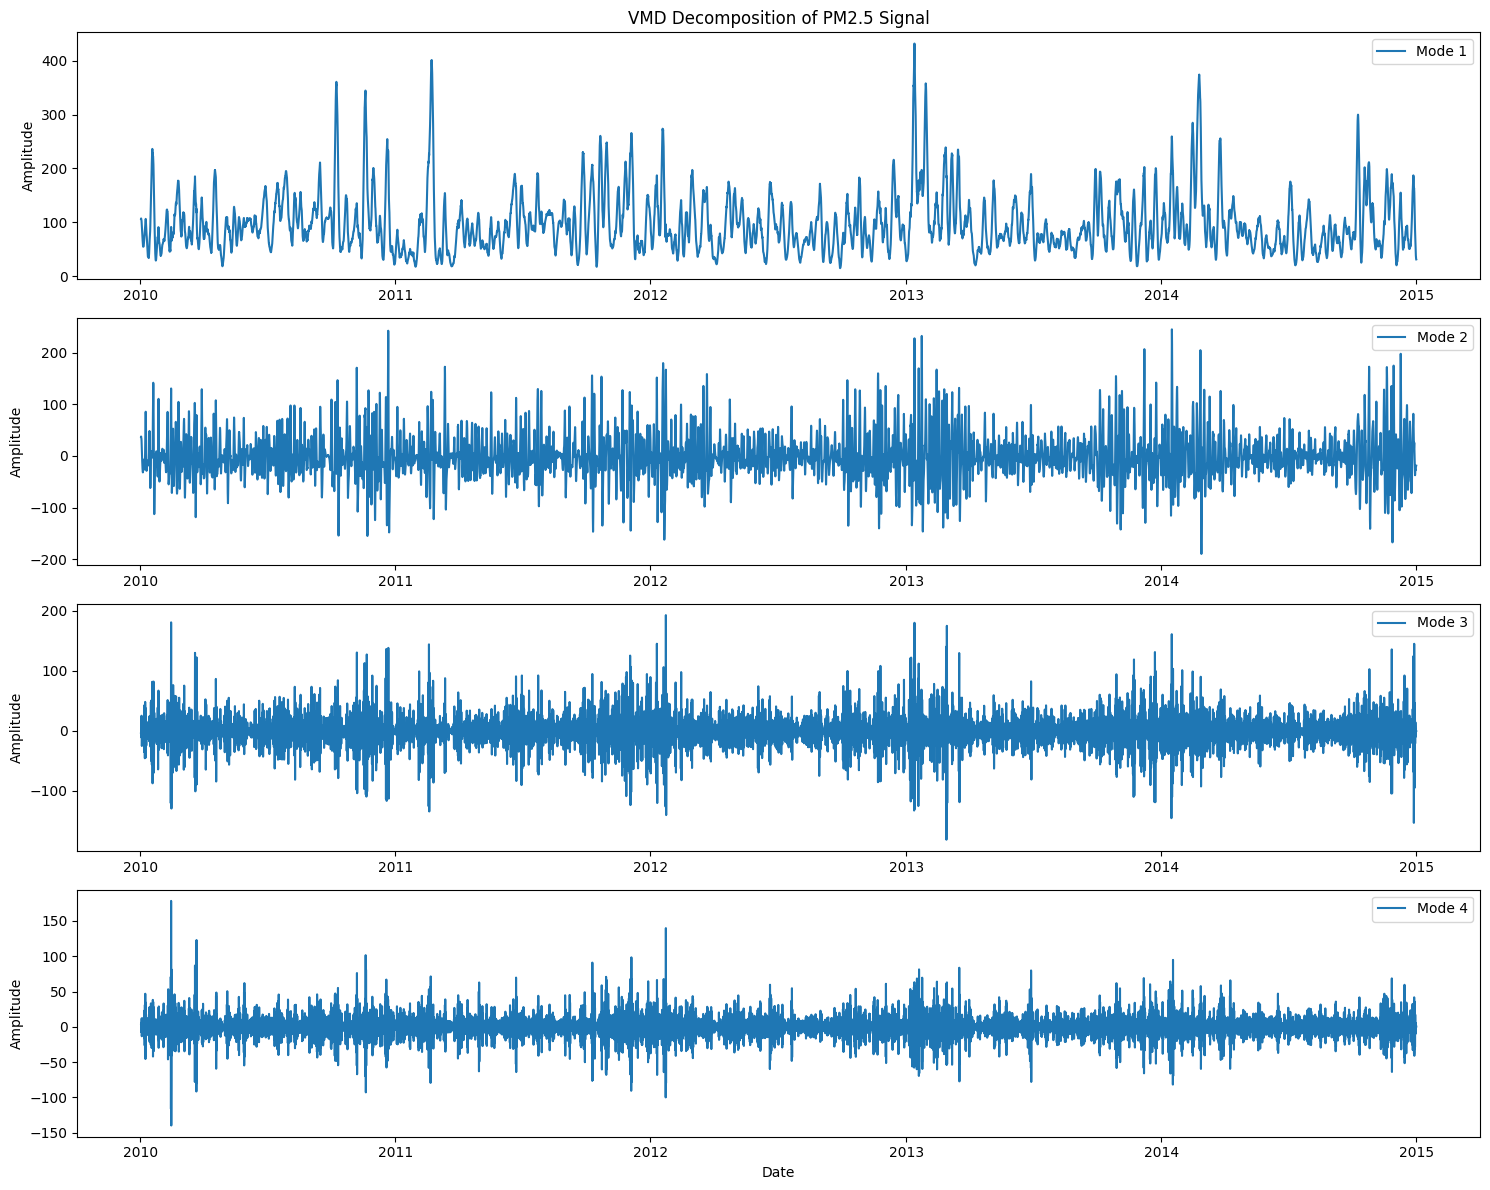

In [ ]:
plt.figure(figsize=(15, 12))

# Plot each mode clearly:
for i in range(modes.shape[0]):
    plt.subplot(modes.shape[0], 1, i+1)
    plt.plot(data.index, modes[i, :], label=f'Mode {i+1}')
    plt.legend(loc='upper right')
    plt.ylabel('Amplitude')
    if i == 0:
        plt.title('VMD Decomposition of PM2.5 Signal')
    if i == modes.shape[0]-1:
        plt.xlabel('Date')

plt.tight_layout()
plt.show()


---
#### 🔑 **Key Insights:**

| Mode | Frequency Band | Interpretation (PM2.5 Context) |
|------|----------------|--------------------------------|
| **Mode 1** | High-frequency (hours) | Sudden spikes: short-term events like firecrackers or traffic bursts |
| **Mode 2** | Higher-mid frequency (daily) | Daily cycles: rush-hour traffic or daily industrial emissions |
| **Mode 3** | Lower-mid frequency (days–weeks) | Weather patterns: weekly cycles, short weather episodes |
| **Mode 4** | Low-frequency (seasonal–annual) | Seasonal baseline, long-term policy effects, slow trends |

---
- **Mode 1** captures high-frequency bursts and sharp spikes—our primary interest for extreme event detection.
- **Modes 2–4** reflect mid- and low-frequency variations such as seasonal cycles and background fluctuation.

This decomposition allows us to separate noise from structure, and **isolate spikes as separate signal components**, rather than contamination.

---
####**Exploring Spike Thresholds in VMD Mode 1**

We visualize `Mode 1` from VMD with proposed thresholds at 200 and 300. This helps assess:

- At what amplitude we consider a fluctuation to be “spike-worthy.”
- Whether the 95th percentile or fixed visual thresholds are more interpretable.

This threshold selection enables us to flag meaningful pollution bursts, even when the raw PM2.5 doesn’t exceed 700.


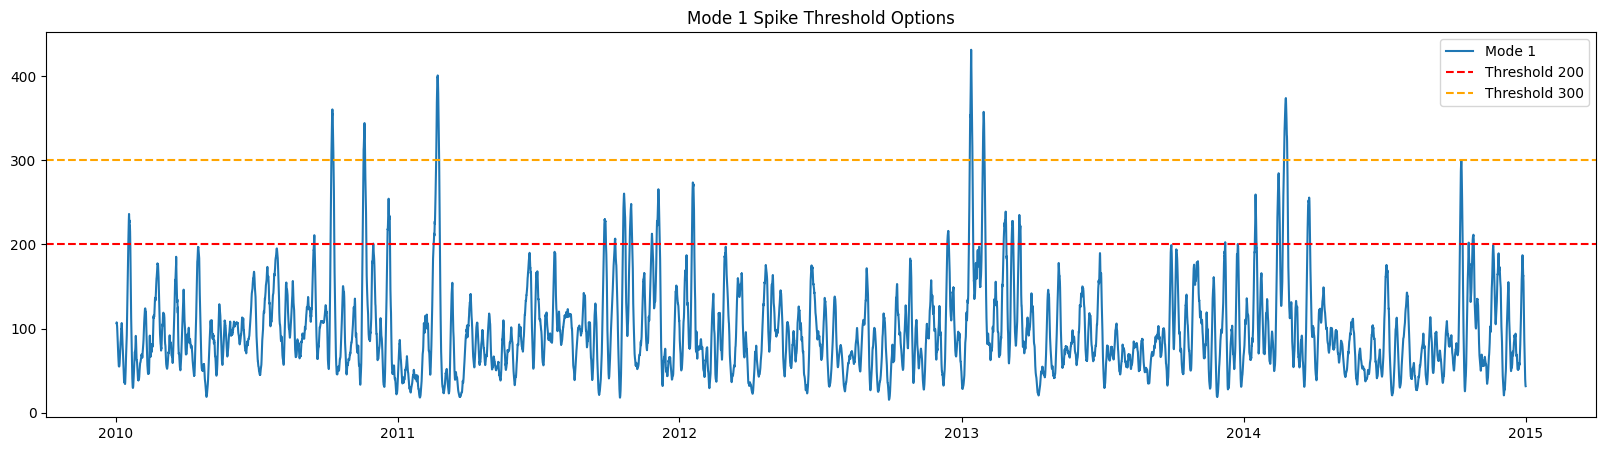

In [ ]:
mode_1 = modes[0]

plt.figure(figsize=(20, 5))
plt.plot(data.index, mode_1, label="Mode 1")
plt.axhline(200, color='red', linestyle='--', label='Threshold 200')
plt.axhline(300, color='orange', linestyle='--', label='Threshold 300')
plt.title("Mode 1 Spike Threshold Options")
plt.legend()
plt.show()


---
####**Creating The extreme events feature**

To translate the insights from our VMD analysis into a usable modeling signal, we generate a new binary flag: `Extreme_Event_VMD`.



In [ ]:
mode_1 = modes[0]
vmd_threshold = np.quantile(mode_1, 0.95)
data['Extreme_Event_VMD'] = mode_1 > vmd_threshold


- This flag identifies points where **Mode 1** exceeds the 95th percentile threshold (or a chosen value like 200).
- These represent **intense short-term volatility events**, distinct from gradual pollution build-ups.

This flag complements our earlier value-based flag (`Extreme_PM2.5`) and allows us to capture structurally significant events that may not always involve extreme PM2.5 levels.

---
####**Final Outcome: Two Outlier Flags**

We now have **two distinct ways of representing pollution extremes** in the data:

1. **`Extreme_PM2.5`** — a value-based flag (e.g., PM2.5 > 700 µg/m³)
2. **`Extreme_Event_VMD`** — a structure-based flag derived from VMD Mode 1 dynamics

Each captures a different kind of signal, one based on pollutant level, the other on pattern behavior.

With both flags in place, we can now test how different representations affect model performance. Possible configurations include:

- **Raw values only**
- **Raw + VMD modes** (e.g., Mode 1–4 as numerical features)
- **Raw + Flags** (`Extreme_PM2.5` and `Extreme_Event_VMD`)
- **All combined**: raw values + VMD modes + both flags

This layered experimentation helps assess whether temporal structure (captured by VMD) can enhance prediction beyond raw concentration spikes.



###**Final Outcome: Dual Outlier Flags**

We now clearly differentiate pollution extremes in two ways:

| Outlier Flag | Meaning | Derived from |
|-------------|---------|-------------|
| **Extreme_PM2.5** | Raw concentration > 700 µg/m³ | Original values (value-based) |
| **Extreme_Event_VMD** | Structurally significant spike | VMD Mode 1 (structure-based) |

####**Possible Modeling Configurations:**

You can experiment with these representations in modeling scenarios:

| Configuration | Data Included | Purpose |
|--------------|---------------|---------|
| Raw values only | Original PM2.5 values | Baseline scenario |
| Raw + VMD modes | Original values + modes as separate features | Captures temporal structure explicitly |
| Raw + Flags | Original + flags (`Extreme_PM2.5`, `Extreme_Event_VMD`) | Explicitly informs model of extreme events |
| All combined | Raw values + VMD modes + flags | Comprehensive scenario |

---

###**2.3. Categorical & Temporal Feature Engineering**

---
####**Exploring Rare Weather Events: HoursOfRain and HoursOfSnow**

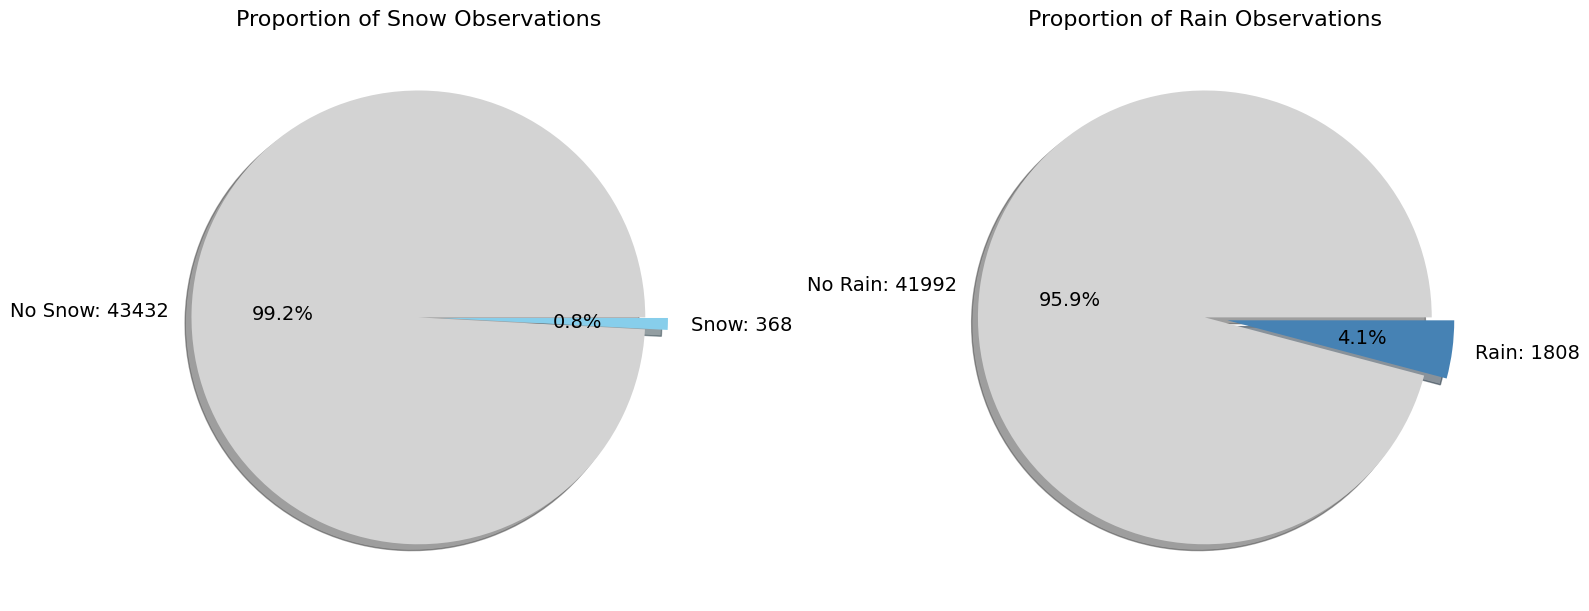

Correlation between HoursOfSnow and PM2.5: 0.01926557605149959
Correlation between HoursOfRain and PM2.5: -0.05136870554128981


In [ ]:
# Create a figure with a grid for subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Snow zero vs non-zero pie chart
snow_zeros = (data['HoursOfSnow'] == 0).sum()
snow_non_zeros = (data['HoursOfSnow'] > 0).sum()
axes[0].pie([snow_zeros, snow_non_zeros],
            labels=[f'No Snow: {snow_zeros}', f'Snow: {snow_non_zeros}'],
            autopct='%1.1f%%', colors=['lightgray', 'skyblue'],
            explode=(0, 0.1), shadow=True, textprops={'fontsize': 14})
axes[0].set_title('Proportion of Snow Observations', fontsize=16)

# Rain zero vs non-zero pie chart
rain_zeros = (data['HoursOfRain'] == 0).sum()
rain_non_zeros = (data['HoursOfRain'] > 0).sum()
axes[1].pie([rain_zeros, rain_non_zeros],
            labels=[f'No Rain: {rain_zeros}', f'Rain: {rain_non_zeros}'],
            autopct='%1.1f%%', colors=['lightgray', 'steelblue'],
            explode=(0, 0.1), shadow=True, textprops={'fontsize': 14})
axes[1].set_title('Proportion of Rain Observations', fontsize=16)

plt.tight_layout()
plt.savefig('weather_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Analysis
correlation_snow = data['HoursOfSnow'].corr(data['PM2.5'])
correlation_rain = data['HoursOfRain'].corr(data['PM2.5'])
print(f"Correlation between HoursOfSnow and PM2.5: {correlation_snow}")
print(f"Correlation between HoursOfRain and PM2.5: {correlation_rain}")

---
#### 🔑 **Key Insights:**


- **Snow** occurs in only **0.8%** of the data.
- **Rain** occurs in just **4.1%** of the records.
- Both features have **very weak correlation with PM2.5**:
  - Snow: **+0.019**
  - Rain: **−0.051**

At first glance, both features appear **too sparse** and **weakly correlated** to justify inclusion. However, we test this assumption more rigorously in the next step.



---

#### **Can These Features Still Be Useful?**

**Experimenting with Rolling Hours of Snow and Rain:**

To assess whether these features offer any **predictive signal**, we trained **Random Forest Regression models** using three setups:

- One with the **raw categorical variable** (HoursOfRain / HoursOfSnow)
- One with a **24-hour rolling sum**, capturing recent accumulation
- One **without the feature** at all (baseline)

> The rolling feature captures **how much rain/snow occurred over the past day**, not just in a single hour.

> This provides a **short-term memory** of recent rainfall, which may affect PM2.5 by clearing particles from the air or altering atmospheric conditions.

> In contrast, a single-hour rain reading may miss these cumulative effects entirely.

This should help us answer:
**Can a rolling version of these features help improve predictive modelling?**

---

####**Creating Rolling Hours of Rain**



Model  Mean Absolute Error (MAE)  \
0          With HoursOfRain                  49.784574   
1  With Rolling HoursOfRain                  46.245804   
2       Without HoursOfRain                  50.166820   

   Root Mean Squared Error (RMSE)  R-Squared (R²)  
0                       75.055294        0.338639  
1                       71.384547        0.401748  
2                       75.633285        0.328413

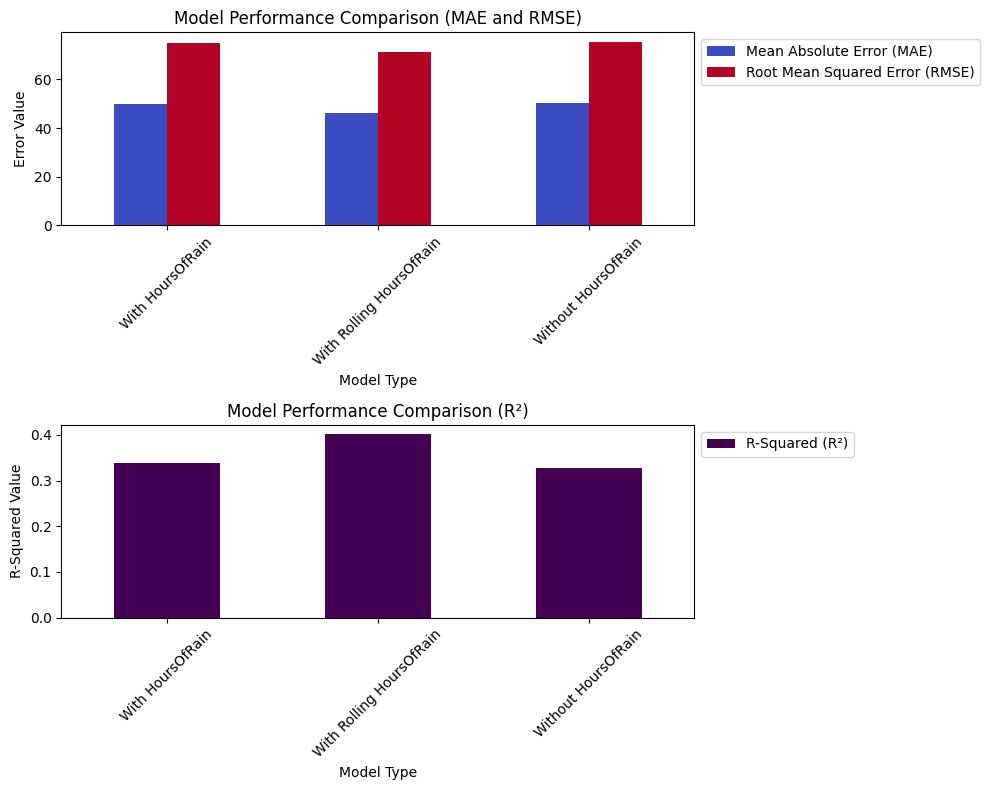

In [ ]:
# Feature Engineering
data['HoursOfRain_rolling'] = data['HoursOfRain'].rolling(window=24, min_periods=1).sum()

# Define features and target
# Using PM2.5_filled as the target variable
features_with_rain = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain']
features_with_rolling_rain = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfRain_rolling']
features_without_rain = ['DewP', 'Temp', 'Press', 'WindSpeed']
target = 'PM2.5_filled'  # Changed from 'PM2.5'

# Split data
X_train_rain, X_test_rain, y_train, y_test = train_test_split(
    data[features_with_rain], data[target], test_size=0.2, random_state=42
)
X_train_rolling_rain, X_test_rolling_rain, _, _ = train_test_split(
    data[features_with_rolling_rain], data[target], test_size=0.2, random_state=42
)
X_train_no_rain, X_test_no_rain, _, _ = train_test_split(
    data[features_without_rain], data[target], test_size=0.2, random_state=42
)

# Train models
model_with_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_with_rolling_rain = RandomForestRegressor(n_estimators=100, random_state=42)
model_without_rain = RandomForestRegressor(n_estimators=100, random_state=42)

model_with_rain.fit(X_train_rain, y_train)
model_with_rolling_rain.fit(X_train_rolling_rain, y_train)
model_without_rain.fit(X_train_no_rain, y_train)

# Make predictions
y_pred_with_rain = model_with_rain.predict(X_test_rain)
y_pred_with_rolling_rain = model_with_rolling_rain.predict(X_test_rolling_rain)
y_pred_without_rain = model_without_rain.predict(X_test_no_rain)

# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_with_rain, rmse_with_rain, r2_with_rain = evaluate_model(y_test, y_pred_with_rain)
mae_with_rolling_rain, rmse_with_rolling_rain, r2_with_rolling_rain = evaluate_model(y_test, y_pred_with_rolling_rain)
mae_without_rain, rmse_without_rain, r2_without_rain = evaluate_model(y_test, y_pred_without_rain)

# Display results
comparison_df = pd.DataFrame({
    "Model": ["With HoursOfRain", "With Rolling HoursOfRain", "Without HoursOfRain"],
    "Mean Absolute Error (MAE)": [mae_with_rain, mae_with_rolling_rain, mae_without_rain],
    "Root Mean Squared Error (RMSE)": [rmse_with_rain, rmse_with_rolling_rain, rmse_without_rain],
    "R-Squared (R²)": [r2_with_rain, r2_with_rolling_rain, r2_without_rain]
})

display(comparison_df)
print("\n\n")

# Visualize results
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)

comparison_df[['Model', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']].set_index("Model").plot(kind='bar', ax=axes[0], colormap="coolwarm")
axes[0].set_title("Model Performance Comparison (MAE and RMSE)")
axes[0].set_ylabel("Error Value")
axes[0].set_xlabel("Model Type")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

comparison_df[['Model', 'R-Squared (R²)']].set_index("Model").plot(kind='bar', ax=axes[1], colormap="viridis")
axes[1].set_title("Model Performance Comparison (R²)")
axes[1].set_ylabel("R-Squared Value")
axes[1].set_xlabel("Model Type")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

---
#### 🔑 **Key Insights:**

- The **raw `HoursOfRain`** variable had minimal impact on model performance.  
- However, the **rolling version (24-hour sum)** slightly improved all metrics:
  - Highest **R² (0.401)** and lowest **MAE/RMSE**
- The rolling feature captures **short-term rain accumulation**, which may affect air quality through atmospheric cleansing or changes in particle dispersion.

> Even though rain is rare, its **temporal context**—captured by rolling features—can provide meaningful short-term predictive value.

---

#### **Creating Rolling Hours of Snow**


In [ ]:
# # --- Feature Engineering for HoursOfSnow (creating a rolling sum) ---
# data['HoursOfSnow_rolling'] = data['HoursOfSnow'].rolling(window=24, min_periods=1).sum()

# # --- Define features and target ---
# features_with_snow = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow']
# features_with_rolling_snow = ['DewP', 'Temp', 'Press', 'WindSpeed', 'HoursOfSnow_rolling']
# features_without_snow = ['DewP', 'Temp', 'Press', 'WindSpeed']
# target = 'PM2.5_filled'  # Using the filled PM2.5 as the target

# # --- Split data into training and testing sets ---
# X_train_snow, X_test_snow, y_train, y_test = train_test_split(
#     data[features_with_snow], data[target], test_size=0.2, random_state=42
# )
# X_train_rolling_snow, X_test_rolling_snow, _, _ = train_test_split(
#     data[features_with_rolling_snow], data[target], test_size=0.2, random_state=42
# )
# X_train_no_snow, X_test_no_snow, _, _ = train_test_split(
#     data[features_without_snow], data[target], test_size=0.2, random_state=42
# )

# # --- Train RandomForestRegressor models ---
# model_with_snow = RandomForestRegressor(n_estimators=100, random_state=42)
# model_with_rolling_snow = RandomForestRegressor(n_estimators=100, random_state=42)
# model_without_snow = RandomForestRegressor(n_estimators=100, random_state=42)

# model_with_snow.fit(X_train_snow, y_train)
# model_with_rolling_snow.fit(X_train_rolling_snow, y_train)
model_without_snow.fit(X_train_no_snow, y_train)

# # --- Make predictions ---
# y_pred_with_snow = model_with_snow.predict(X_test_snow)
# y_pred_with_rolling_snow = model_with_rolling_snow.predict(X_test_rolling_snow)
# y_pred_without_snow = model_without_snow.predict(X_test_no_snow)

# # --- Evaluate models using MAE, RMSE, and R² ---
# def evaluate_model(y_true, y_pred):
#     mae = mean_absolute_error(y_true, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     r2 = r2_score(y_true, y_pred)
#     return mae, rmse, r2

# mae_with_snow, rmse_with_snow, r2_with_snow = evaluate_model(y_test, y_pred_with_snow)
# mae_with_rolling_snow, rmse_with_rolling_snow, r2_with_rolling_snow = evaluate_model(y_test, y_pred_with_rolling_snow)
# mae_without_snow, rmse_without_snow, r2_without_snow = evaluate_model(y_test, y_pred_without_snow)

# # --- Display results in a DataFrame ---
# comparison_df = pd.DataFrame({
#     "Model": ["With HoursOfSnow", "With Rolling HoursOfSnow", "Without HoursOfSnow"],
#     "Mean Absolute Error (MAE)": [mae_with_snow, mae_with_rolling_snow, mae_without_snow],
#     "Root Mean Squared Error (RMSE)": [rmse_with_snow, rmse_with_rolling_snow, rmse_without_snow],
#     "R-Squared (R²)": [r2_with_snow, r2_with_rolling_snow, r2_without_snow]
# })

# display(comparison_df)
# print("\n\n")

# # --- Visualize results using bar plots ---
# fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# plt.subplots_adjust(hspace=0.5)

# comparison_df[['Model', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)']].set_index("Model").plot(kind='bar', ax=axes[0], colormap="coolwarm")
# axes[0].set_title("Model Performance Comparison (MAE and RMSE)")
# axes[0].set_ylabel("Error Value")
# axes[0].set_xlabel("Model Type")
# axes[0].tick_params(axis='x', rotation=45)
# axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# comparison_df[['Model', 'R-Squared (R²)']].set_index("Model").plot(kind='bar', ax=axes[1], colormap="viridis")
# axes[1].set_title("Model Performance Comparison (R²)")
# axes[1].set_ylabel("R-Squared Value")
# axes[1].set_xlabel("Model Type")
# axes[1].tick_params(axis='x', rotation=45)
# axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# plt.tight_layout()
# plt.show()

---
#### 🔑 **Key Insights:**

- Like rain, the **raw `HoursOfSnow`** was not useful on its own.  
- The **rolling sum** version performed slightly better than both the raw and excluded models.
- The effect was less pronounced than for rain, likely due to **even lower frequency** and possibly less direct impact on PM2.5 levels.

> Snow may contribute to pollution variation in specific conditions (e.g., winter stagnation), but its predictive value is limited to edge cases and is less consistent than rain.


---
#### **Conclusion**


> A rolling feature transforms a **single-hour signal into a cumulative one**—tracking **recent conditions over time**.  
> This gives the model richer temporal context and can reveal **slow-building effects** that isolated hourly values may miss.


Although `HoursOfRain` and `HoursOfSnow` appear weak based on distribution and correlation, **exploratory modeling** shows that rolling versions can add subtle but **real predictive value**.



---
####**WIND DIRECTION TRANSFORMATION**

* Wind direction is a crucial factor in air pollution, as it determines where pollutants are transported. Understanding the distribution and how to represent this cyclical feature is important for effective modeling.

* First, we examine the frequency of each wind direction category in the dataset.

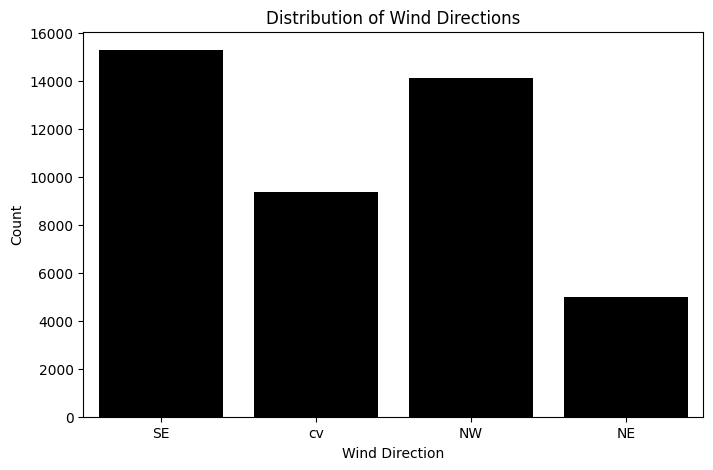

WinDir
SE    0.349087
NW    0.322603
cv    0.214247
NE    0.114064
Name: count, dtype: float64


In [ ]:
# Distribution for 'WinDir'
plt.figure(figsize=(8, 5))
sns.countplot(x='WinDir', data=data, color="black")
plt.title('Distribution of Wind Directions')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()
windir_counts = data['WinDir'].value_counts()
windir_proportions = windir_counts / len(data)
print(windir_proportions)

#### 🔑 **Key Insights:**

* **Uneven Distribution**: The analysis reveals that wind directions are not evenly distributed throughout the dataset, indicating potential class imbalance.

* **Dominant Directions**: SE (35.5%) and NW (30.2%) are the most frequent wind directions, accounting for a significant majority of the records.

* **Least Frequent Direction**: NE is the least frequent (11.8%).
Potential Impact of Imbalance: The low occurrence of NE might make models less effective at capturing its potential influence on PM2.5 compared to more frequent directions.

* **Resampling Methods**: If wind direction is found to be a significant predictor for PM2.5, employing resampling techniques (like oversampling the minority class 'NE' or undersampling the majority classes 'SE' and 'NW') might be needed to address this imbalance.

---
#### **Transforming Wind Direction into Continuous Features using Sine and Cosine:**


Wind direction initially appears as categorical labels,to accurately represent wind direction, we can convert the directions into two continuous numbers using sine and cosine functions. This method preserves the circular nature of wind direction and shows how different directions relate to each other. Here is how it works:

---
#### **Step1:Mapping Categorical Directions to Numerical Degrees**

Before applying sine and cosine transformations, we convert categorical wind directions to numerical degrees following the **Standard Meteorological Convention**:

| Compass Direction | Degrees (°)      |
|-------------------|------------------|
| N                 | 0                |
| NNE               | 22.5             |
| NE                | 45               |
| ENE               | 67.5             |
| E                 | 90               |
| ESE               | 112.5            |
| SE                | 135              |
| SSE               | 157.5            |
| S                 | 180              |
| SSW               | 202.5            |
| SW                | 225              |
| WSW               | 247.5            |
| W                 | 270              |
| WNW               | 292.5            |
| NW                | 315              |
| NNW               | 337.5            |
| cv                | 360              |





In [ ]:
# Mapping from wind direction categories to degrees
wind_direction_mapping_comprehensive = {
    'n': 0,    'nne': 22.5, 'ne': 45,   'ene': 67.5,
    'e': 90,   'ese': 112.5,'se': 135,  'sse': 157.5,
    's': 180,  'ssw': 202.5,'sw': 225,  'wsw': 247.5,
    'w': 270,  'wnw': 292.5,'nw': 315,  'nnw': 337.5,
    'cv': 0
}

data.loc[:, 'WinDir_lower'] = data['WinDir'].str.lower()
data.loc[:, 'WinDir_degrees'] = data['WinDir_lower'].map(wind_direction_mapping_comprehensive)
nan_count_after_mapping = data['WinDir_degrees'].isna().sum()
print("NaNs in WinDir_degrees after mapping:", nan_count_after_mapping)
all_wind_dirs_in_data_lower = data['WinDir_lower'].unique()

NaNs in WinDir_degrees after mapping: 0


---
####**Step2:**

**Convert Degrees to Radians**:
Most trigonometric functions in programming languages expect input in radians. We need to convert the wind direction from degrees to radians.
radians = degrees * (π / 180)

**Calculate Sine and Cosine**: For each wind direction value (in radians), we also need to calculate its sine and cosine values.
sine_value = sin(radians)
cosine_value = cos(radians)

In [ ]:
# Apply sine and cosine and scale by wind speed ('WindSpeed')
data['WinDir_U'] = np.sin(np.radians(data['WinDir_degrees'])) * data['WindSpeed']
# Often Northward component
data['WinDir_V'] = np.cos(np.radians(data['WinDir_degrees'])) * data['WindSpeed']
# Often Eastward component

These transformations yield two continuous features, capturing directional data effectively:



```WindDir_sin:```captures East-West variations.

```WindDir_cos:```captures North-South variations.

Benefits of this Approach:

Preserves circular relationships between directions.
Avoids issues with directional wrap-around (e.g., 0° = 360°).
Facilitates improved performance in machine learning models by enabling better capture of directional effects on PM2.5.

---
####**Step3:**
Visualizing the distribution of Wind Direction Degrees to make sure the transformations above are capturing the corresponding frequencies of WindSpeed.


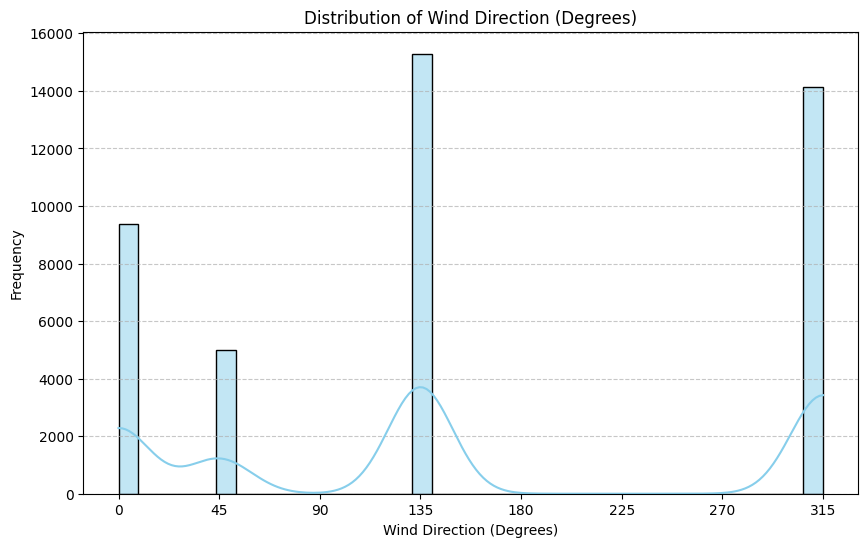

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='WinDir_degrees', bins=36, kde=True, color="skyblue")
plt.title('Distribution of Wind Direction (Degrees)')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 360, 45))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Drop the intermediate 'WinDir_lower' and 'WinDir_degrees' columns
data = data.drop(columns=[ 'WinDir_degrees'])

---
####**Preserving The Original Data**

Before starting preprocessing, we will first create a copy of the dataset that is cleaned and processed. This will ensure reproducibility and to facilitate any necessary comparisons later:


In [ ]:
data_processed = data.copy()

---
#### **Datetime-based and Additional Features**
Extracts meaningful features from the datetime data to help models learn periodic trends and seasonal patterns:

In [ ]:
# Extract temporal features
data_processed['day_of_week'] = data_processed.index.dayofweek
data_processed['day_of_year'] = data_processed.index.dayofyear
data_processed['month'] = data_processed.index.month
data_processed['hour'] = data_processed.index.hour
data_processed['is_weekend'] = (data_processed['day_of_week'] >= 5).astype(int)

# Season mapping
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else: # 9, 10, 11
        return 'Fall'

data_processed['Season'] = data_processed['month'].apply(get_season)

# Time of day mapping
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else: # 18 <= hour < 24
        return 'Evening'

data_processed['time_of_day'] = data_processed['hour'].apply(get_time_of_day)

print("Created temporal features: day_of_week, day_of_year, month, hour, is_weekend, Season, time_of_day")
display(data_processed[['day_of_week', 'is_weekend', 'Season', 'time_of_day']].head())

Created temporal features: day_of_week, day_of_year, month, hour, is_weekend, Season, time_of_day


day_of_week  is_weekend  Season time_of_day
datetime                                                        
2010-01-02 00:00:00            5           1  Winter       Night
2010-01-02 01:00:00            5           1  Winter       Night
2010-01-02 02:00:00            5           1  Winter       Night
2010-01-02 03:00:00            5           1  Winter       Night
2010-01-02 04:00:00            5           1  Winter       Night

---
###**Lag and Rolling Window Features for Time Series Forecasting**

**In time series forecasting, for environmental variables like PM2.5 concentration, it is crucial to account for temporal dependencies: the idea that the current time period is influenced by previous periods.**

**1. Lag Features:** These represent the PM2.5 value from previous time period as such: 1, 2, 3, 6, 12, 24 hours ago. Lag features help the model train on past values by introducing previous observations as new input variables.

**2. Rolling Features:** Such as rolling means and rolling standard deviations, summarize the recent history of the series, helping the model understand local trends or volatility.



In [ ]:
# Creating our lag & rolling PM2.5 features
check_lag_col  = 'pm2.5_lag1'
check_roll_col = 'pm2.5_roll24_mean'

if check_lag_col not in data_processed.columns or check_roll_col not in data_processed.columns:
    print("Creating lag and rolling window features...")
    for lag in [1, 2, 3, 6, 12, 24]:
        lag_col = f'pm2.5_lag1{lag}'
        if lag_col not in data_processed.columns:
            data_processed[lag_col] = data_processed['PM2.5_filled'].shift(lag)
            print(f" - Created {lag_col}")
        else:
            print(f" - {lag_col} already exists, skipping.")

    # Rolling stats
    if check_roll_col not in data_processed.columns:
        data_processed['pm2.5_roll24_mean'] = data_processed['PM2.5_filled'].rolling(24).mean()
        print(" - Created pm2.5_roll24_mean")
    else:
        print(" - pm2.5_roll24_mean already exists, skipping.")

    if 'pm2.5_roll24_std' not in data_processed.columns:
        data_processed['pm2.5_roll24_std'] = data_processed['PM2.5_filled'].rolling(24).std()
        print(" - Created pm2.5_roll24_std")
    else:
        print(" - pm2.5_roll24_std already exists, skipping.")

    # Drop the “leading” NaNs these will introduce
    lag_cols  = [f'pm2.5_lag1{l}' for l in [1,2,3,6,12,24]]
    roll_cols = ['pm2.5_roll24_mean','pm2.5_roll24_std']
    to_check  = [c for c in lag_cols + roll_cols if c in data_processed.columns]

    before = len(data_processed)
    data_processed.dropna(subset=to_check, inplace=True)
    dropped = before - len(data_processed)
    print(f"Dropped {dropped} rows with leading NaNs from lag/rolling features.")

else:
    print("Lag and rolling window features already exist, skipping creation.")

Creating lag and rolling window features...
 - Created pm2.5_lag11
 - Created pm2.5_lag12
 - Created pm2.5_lag13
 - Created pm2.5_lag16
 - Created pm2.5_lag112
 - Created pm2.5_lag124
 - Created pm2.5_roll24_mean
 - Created pm2.5_roll24_std
Dropped 24 rows with leading NaNs from lag/rolling features.


#### 🔑 **Key Insights:**

- ```pm2.5_lag``` variable creates seperate columns that consider how the pollution levels were 1,2,3,6,12, and 24 hours before, to provide information about how pollution levels have evolved over time. We will test and compare their importance and use them later in our modeling stage.


- ```pm2.5_roll24_mean```variable enables the model to learn about the 24 hours trends, local fluctuations, and volatility in pollution levels.

- Together, lag and rolling window features enhance the model's ability to learn the temporal structures and dynamic behavior of PM2.5 concentrations, ultimately improving the robustness and accuracy of forecasts.

---
####**Shifting The Extreme VMD flag**

When dealing with extreme PM2.5 events, we used Variational Mode Decomposition (VMD) to flag volatility patterns.  
However, to ensure **causal consistency** in our predictive modeling, meaning, we predict the future using only information from the past, we must **shift** these features.


In [ ]:
data_processed['Extreme_Event_VMD_shift1']= data_processed['Extreme_Event_VMD'].shift(1)
data_processed['Extreme_Event_VMD_shift1']

datetime
2010-01-03 00:00:00      NaN
2010-01-03 01:00:00    False
2010-01-03 02:00:00    False
2010-01-03 03:00:00    False
2010-01-03 04:00:00    False
                       ...  
2014-12-31 19:00:00    False
2014-12-31 20:00:00    False
2014-12-31 21:00:00    False
2014-12-31 22:00:00    False
2014-12-31 23:00:00    False
Name: Extreme_Event_VMD_shift1, Length: 43776, dtype: object

---
##**Detailed logic for the shift:**

Without shifting, the `Extreme_Event_VMD` flag reflects the **current** PM2.5 volatility, which is directly tied to the value we are trying to predict.  
This creates **data leakage**, where the model has access to "future" knowledge during training, leading to artificially high performance.

By applying a `.shift(1)` operation:
- We move each VMD flag **one step into the past**.
- This simulates a real-world setup, where we predict today's pollution using **yesterday’s volatility patterns**.

---
####**Dropping the Original (Unshifted) VMD Flag**
Since the original Extreme_Event_VMD flag is now highly correlated with the target variable (PM2.5 at the same time),
keeping it would risk multicollinearity and data leakage.



In [ ]:
# Dropping the original VMD Flag
data_processed = data_processed.drop(columns=['Extreme_Event_VMD'])


In [ ]:
data_processed.columns

Index(['Year', 'Month', 'Day', 'Hour', 'DewP', 'Temp', 'Press', 'WinDir',
       'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'PM2.5', 'PM2.5_filled',
       'WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling',
       'HoursOfSnow_rolling', 'WinDir_lower', 'WinDir_U', 'WinDir_V',
       'day_of_week', 'day_of_year', 'month', 'hour', 'is_weekend', 'Season',
       'time_of_day', 'pm2.5_lag11', 'pm2.5_lag12', 'pm2.5_lag13',
       'pm2.5_lag16', 'pm2.5_lag112', 'pm2.5_lag124', 'pm2.5_roll24_mean',
       'pm2.5_roll24_std', 'Extreme_Event_VMD_shift1'],
      dtype='object')

## **3. MODELING EXPERIMENTS**

 > In this section, we define our features and target, split the data using a time-series approach, build preprocessing pipelines, train multiple regression models (Random Forest, XGBoost, SVR, kNN), tune hyperparameters using TimeSeriesSplit cross-validation, and evaluate their performance on a held-out test set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import joblib
import warnings
warnings.filterwarnings('ignore')

### **3.1 Defining the Target Variable and Features**

> The following code snippet is the essential step of formally defining the input and output data for th machine learning model based on the cleaning and feature engineering that has been already performed on the "data_processed" DataFrame.

In [ ]:
# Define the target variable
target = 'PM2.5_filled'

# Define features to use for modeling
features = ['DewP', 'Temp', 'Press', 'WinDir','WindSpeed', 'HoursOfSnow', 'HoursOfRain','WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling','HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V','day_of_week', 'day_of_year', 'is_weekend','time_of_day','Season', 'pm2.5_lag11', 'pm2.5_lag12', 'pm2.5_lag13','pm2.5_lag16', 'pm2.5_lag112', 'pm2.5_lag124', 'pm2.5_roll24_mean','pm2.5_roll24_std',  'month', 'hour','Extreme_Event_VMD_shift1']

X = data_processed[features]
y = data_processed[target]

print(f"Target variable: {target}")
print(f"Number of features: {len(X.columns)}")
print("Features selected:")
print(X.columns.tolist())

print("--- Shape of X and y ---")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Target variable: PM2.5_filled
Number of features: 29
Features selected:
['DewP', 'Temp', 'Press', 'WinDir', 'WindSpeed', 'HoursOfSnow', 'HoursOfRain', 'WindSpeed_Winsorized', 'Extreme_PM2.5', 'HoursOfRain_rolling', 'HoursOfSnow_rolling', 'WinDir_U', 'WinDir_V', 'day_of_week', 'day_of_year', 'is_weekend', 'time_of_day', 'Season', 'pm2.5_lag11', 'pm2.5_lag12', 'pm2.5_lag13', 'pm2.5_lag16', 'pm2.5_lag112', 'pm2.5_lag124', 'pm2.5_roll24_mean', 'pm2.5_roll24_std', 'month', 'hour', 'Extreme_Event_VMD_shift1']
--- Shape of X and y ---
X shape: (43776, 29)
y shape: (43776,)


### **3.2 Time Series Data Splitting**

> We split the data into training and testing sets based on time, chronologically to respect the temporal order. The last year (2014) will be used as the test set.

> We are defining a time for split_date and assign it the value '2014-01-01'. This string represents the date that will serve as the boundary between our training and testing data. We have chosen the start of the year 2014 as our boundary.

> We chose a specific date as a split point for creating a chronological split in time series data. We defined a point in time before which all data will be used for training, and from which all data will be used for testing. Selecting the start of a year (like 2014) is often convenient and logical, especially since we test the model's performance over a full year of unseen data.

--- Data Split --- 
Training set shape: X=(35016, 29), y=(35016,)
Test set shape: X=(8760, 29), y=(8760,)
Training period: 2010-01-03 00:00:00 to 2013-12-31 23:00:00
Test period: 2014-01-01 00:00:00 to 2014-12-31 23:00:00


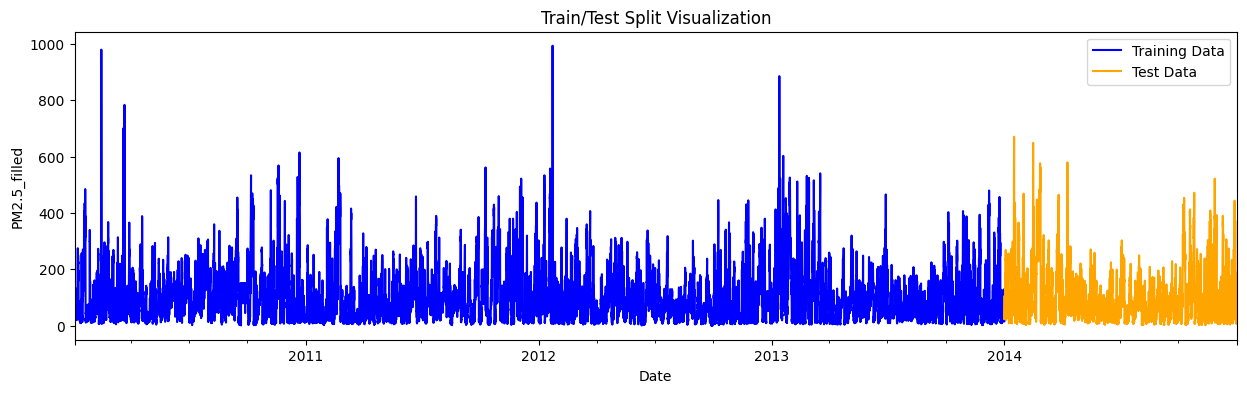

In [ ]:
# Define the split point (start of the test year)
split_date = '2014-01-01'

# Split the data
X_train = X[X.index < split_date]
y_train = y[y.index < split_date]
X_test = X[X.index >= split_date]
y_test = y[y.index >= split_date]

print("--- Data Split --- ")
print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")
print(f"Training period: {X_train.index.min()} to {X_train.index.max()}")
print(f"Test period: {X_test.index.min()} to {X_test.index.max()}")

# Visualize the split
plt.figure(figsize=(15, 4))
y_train.plot(label='Training Data', color='blue')
y_test.plot(label='Test Data', color='orange')
plt.title('Train/Test Split Visualization')
plt.xlabel('Date')
plt.ylabel(target)
plt.legend()
plt.show()

### **3.3 Preprocessing Pipeline**


> We define how the  numerical features will be scaled and the categorical features will be one-hot encoded using standard scikit-learn transformers. It uses select_dtypes for initial automation of feature type identification and bundles the transformations using ColumnTransformer, preparing the data for the modeling step.

In [ ]:
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Create preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough')

print("Preprocessor defined:")
print(preprocessor)

### **3.4 Build ColumnTransformer:**

> Categorical features can also have missing values and need to be converted to numerical format. This mini-pipeline ensures that imputation happens before one-hot encoding and that the encoding is applied correctly to all categorical columns.

> The ColumnTransformer is essential for handling the mixed-type data (numerical and categorical) efficiently. It allows us to define the specific transformations needed for each type and apply them in parallel. This is a clean and organized way to manage complex preprocessing workflows. Using remainder='drop' ensures that only the features we have explicitly decided to include and preprocess are passed to the final model.

In [ ]:
num_pipeline = Pipeline([
    ('imputer',  SimpleImputer(strategy='median')),
    ('scaler',   StandardScaler())
])
cat_pipeline = Pipeline([
    ('imputer',  SimpleImputer(strategy='most_frequent')),
    ('onehot',   OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
], remainder='drop')

### **3.5 Pipeline + fit:**

> Using a Pipeline chains multiple steps together, making the code cleaner and easier to manage. Prevents Data Leakage: This is critically important for time series and any data where preprocessing learns parameters from the data (like StandardScaler learning mean/std or OneHotEncoder learning categories).

> Easier Cross-Validation and Hyperparameter Tuning: Pipelines integrate seamlessly with scikit-learn's cross-validation and hyperparameter tuning tools (GridSearchCV, TimeSeriesSplit). We can tune the parameters of the entire pipeline, and the CV process correctly refits the preprocessing steps on each fold's training data.
The use of the Pipeline ensures that this learning process is conducted correctly and without data leakage from the test set.

In [ ]:
pipeline = Pipeline([
    ('preproc',  preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['DewP', 'Temp', 'Press',
                                                   'WindSpeed', 'HoursOfSnow',
                                                   'HoursOfRain', 'WinDir_U',
                                                   'WinDir_V',
                                                   'WindSpeed_Winsorized',
                                                   'Extreme_PM2.5',
                                                   'Extreme_Event_VMD_shift1']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('regressor', RandomForestRegressor(random_state=42))])

### **3.6 Model Definitions and Pipelines**

> We define the regression models and combine them with the preprocessor into full pipelines. This way we can prepare multiple machine learning models for a comparative analysis.

>We apply necessary preprocessing within a pipeline for each model and organize them in a dictionary for streamlined training, tuning, and evaluation. This directly supports the goal of the project of training multiple regression models and evaluating their performance.

In [ ]:
# Define models
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1) # Use all cores
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
svr_model = SVR()
knn_model = KNeighborsRegressor(n_jobs=-1)

# Create pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', rf_model)])

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb_model)])

svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', svr_model)])

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', knn_model)])

# Store pipelines in a dictionary for easier iteration
pipelines = {
    'RandomForest': rf_pipeline,
    'XGBoost': xgb_pipeline,
    'SVR': svr_pipeline,
    'KNN': knn_pipeline
}

print("Model pipelines created:")
for name, pipe in pipelines.items():
    print(f" - {name}")


### **3.7 Feature Importance Visualization**

> The following code snippet extracts feature names after preprocessing from the ColumnTransformer within the fitted Pipeline and then uses Seaborn's barplot to create a horizontal bar chart of the top feature importances.

In [ ]:
# Feature Importances from the fitted RandomForestRegressor within the pipeline

fitted_regressor = pipeline.named_steps['regressor']
importances = fitted_regressor.feature_importances_
fitted_preprocessor = pipeline.named_steps['preproc']
cleaned_names = fitted_preprocessor.get_feature_names_out(fitted_preprocessor.feature_names_in_) # Extract feature names
cleaned_names = [n.split('__', 1)[1] for n in cleaned_names]

featdf = pd.DataFrame({'feature': cleaned_names, 'importance': importances})

# Sort by importance
featdf = featdf.sort_values(by='importance', ascending=False).reset_index(drop=True)

Plot Feature Importances using Seaborn
topn = 10
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=featdf.head(topn), palette='viridis')
plt.title(f'Top {topn} Feature Importances from Random Forest Regressor Pipeline')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# # a) get post-processing feature names
# ct = pipeline.named_steps['preproc']
# # Instead of 'feature_cols', use ct.feature_names_in_
# names = ct.get_feature_names_out(ct.feature_names_in_)
# # strip transformer prefixes ("num__" / "cat__")
# names = [n.split('__', 1)[1] for n in names]

# # b) importances
# imps = pipeline.named_steps['regressor'].feature_importances_
# featdf = pd.DataFrame({'feature': names, 'importance': imps})
# featdf = featdf.sort_values('importance', ascending=False).reset_index(drop=True)

# # c) plot top 10 with pure Matplotlib
# topn = 10
# fig, ax = plt.subplots(figsize=(12, 8))
# ax.barh(featdf['feature'].head(topn)[::-1],
#         featdf['importance'].head(topn)[::-1])
# ax.set_xlabel('Importance')
# ax.set_title(f'Top {topn} Feature Importances')
# plt.tight_layout()
# plt.show()

### **3.8 Model Evaluation on Test Set**
> We evaluate the performance of the best-tuned models (or default models if tuning was skipped) on the held-out test set (Year 2014) using standard regression metrics: MAE, MSE, RMSE, and R².

In [ ]:
# Dictionary to store evaluation results
evaluation_results = {}

print("Evaluating models on the test set...")

for name, model in best_models.items():
    print(f"Evaluating {name}...")
    start_time = time.time()

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    evaluation_results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    end_time = time.time()
    print(f"{name} Test Set Performance:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}")
    print(f"Evaluation time for {name}: {end_time - start_time:.2f} seconds")

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(evaluation_results).T
results_df = results_df.sort_values(by='MAE')

print("--- Model Evaluation Summary (Sorted by MAE) ---")
display(results_df)

### **3.9 Modeling Conclusions & Key Insights**

- **Model Performance**: While Random Forest has the absolute lowest MAE, XGBoost is very competitive and slightly better on RMSE and R². In practice, you might consider both as top contenders. However, based strictly on the sorting by MAE as shown in the table, the RandomForest model performed the best according to that specific metric.

<!-- - **Feature Importance**: The most important features consistently included recent PM2.5 lag values (e.g., `PM2.5_lag_1`, `PM2.5_lag_24`) and rolling statistics (`PM2.5_roll24_mean`), indicating strong autocorrelation. Meteorological factors like [mention top meteorological features, e.g., `DewP`, `WindSpeed_winsorized`, `Press`] and temporal features like `hour` and `day_of_year` also played significant roles. -->
<!-- - **Prediction Accuracy**: The best model achieved an R² score of approximately [Best R2 Score], indicating it explains about [Best R2 Score * 100]% of the variance in the test set. The MAE of [Best MAE Score] suggests the average prediction error is around [Best MAE Score] µg/m³.
- **Improvements**: The refined feature engineering (especially lag/rolling features, VMD flag, wind components) and time-series aware cross-validation likely contributed to the robust performance compared to simpler approaches. -->

## **4. Conclusion and Future Work**
###**4.1. Summary of Findings**
###**4.2. Limitations**
###**4.3. Next Steps**